# USD MSADS599 NFL Data Project

### Data Imports

In [1]:
import re
import os
import pandas as pd
import numpy as np
import math
import glob
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2


from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

import warnings
warnings.filterwarnings("ignore")

In [2]:
nfl = pd.read_csv('nfl_team_stats_2002-2023.csv')
nfl

season        week        date        away     home  score_away  \
0       2002           1  2002-09-05       49ers   Giants          16   
1       2002           1  2002-09-08        Jets    Bills          37   
2       2002           1  2002-09-08     Vikings    Bears          23   
3       2002           1  2002-09-08    Chargers  Bengals          34   
4       2002           1  2002-09-08      Chiefs   Browns          40   
...      ...         ...         ...         ...      ...         ...   
5924    2023    Division  2024-01-21  Buccaneers    Lions          23   
5925    2023    Division  2024-01-21      Chiefs    Bills          27   
5926    2023  Conference  2024-01-28      Chiefs   Ravens          17   
5927    2023  Conference  2024-01-28       Lions    49ers          31   
5928    2023   Superbowl  2024-02-11       49ers   Chiefs          22   

      score_home  first_downs_away  first_downs_home  third_down_comp_away  \
0             13                13                21                     4   
1             31                18                26                     2   
2             27                19                20                     5   
3              6                27                13                     6   
4             39                24                24                     5   
...          ...               ...               ...                   ...   
5924          31                23                26                     4   
5925          24                21                27                     1   
5926          10                22                16                     8   
5927          34                28                23                     6   
5928          25                23                24                     3   

      ...  redzone_comp_home  redzone_att_home  fumbles_away  fumbles_home  \
0     ...                  0                 6             0             0   
1     ...                  0                 8             1             1   
2     ...                  0                 6             1             1   
3     ...                  0                 5             0             0   
4     ...                  0                10             0             1   
...   ...                ...               ...           ...           ...   
5924  ...                  3                 4             0             0   
5925  ...                  3                 4             1             0   
5926  ...                  0                 1             0             2   
5927  ...                  4                 5             1             0   
5928  ...                  2                 6             2             1   

      interceptions_away  interceptions_home  def_st_td_away  def_st_td_home  \
0                      1                   3               0               0   
1                      0                   2               2               0   
2                      2                   1               0               0   
3                      0                   1               0               0   
4                      1                   0               0               0   
...                  ...                 ...             ...             ...   
5924                   2                   0               0               0   
5925                   0                   0               0               0   
5926                   0                   1               0               0   
5927                   0                   1               0               0   
5928                   0                   1               0               0   

      possession_away  possession_home  
0               27:32            32:28  
1               21:06            39:08  
2               31:31            28:29  
3               37:48            22:12  
4               30:16            29:44  
...               ...              ...  
5924   

# Data Preprocessing

### Understanding the Data Structure

In [3]:
nfl.dtypes

season                    int64
week                     object
date                     object
away                     object
home                     object
score_away                int64
score_home                int64
first_downs_away          int64
first_downs_home          int64
third_down_comp_away      int64
third_down_att_away       int64
third_down_comp_home      int64
third_down_att_home       int64
fourth_down_comp_away     int64
fourth_down_att_away      int64
fourth_down_comp_home     int64
fourth_down_att_home      int64
plays_away                int64
plays_home                int64
drives_away               int64
drives_home               int64
yards_away                int64
yards_home                int64
pass_comp_away            int64
pass_att_away             int64
pass_yards_away           int64
pass_comp_home            int64
pass_att_home             int64
pass_yards_home           int64
sacks_num_away            int64
sacks_yards_away          int64
sacks_nu

In [4]:
nfl.describe()

season   score_away   score_home  first_downs_away  \
count  5929.000000  5929.000000  5929.000000       5929.000000   
mean   2012.587452    21.100523    23.401585         19.016360   
std       6.380254    10.048298    10.275054          5.070046   
min    2002.000000     0.000000     0.000000          3.000000   
25%    2007.000000    14.000000    17.000000         15.000000   
50%    2013.000000    20.000000    23.000000         19.000000   
75%    2018.000000    28.000000    30.000000         22.000000   
max    2023.000000    59.000000    70.000000         37.000000   

       first_downs_home  third_down_comp_away  third_down_att_away  \
count       5929.000000           5929.000000          5929.000000   
mean          19.969135              5.068308            13.264294   
std            4.963860              2.259159             2.524804   
min            3.000000              0.000000             5.000000   
25%           17.000000              3.000000            12.000000   
50%           20.000000              5.000000            13.000000   
75%           23.000000              7.000000            15.000000   
max           40.000000             15.000000            24.000000   

       third_down_comp_home  third_down_att_home  fourth_down_comp_away  ...  \
count           5929.000000          5929.000000             5929.00000  ...   
mean               5.232248            13.142182                0.53972  ...   
std                2.238903             2.570961                0.77895  ...   
min                0.000000             5.000000                0.00000  ...   
25%                4.000000            11.000000                0.00000  ...   
50%                5.000000            13.000000                0.00000  ...   
75%                7.000000            15.000000                1.00000  ...   
max               15.000000            24.000000                6.00000  ...   

       redzone_comp_away  redzone_att_away  redzone_comp_home  \
count        5929.000000       5929.000000        5929.000000   
mean            1.273908          3.230899           1.432619   
std             1.238522          1.940881           1.339812   
min             0.000000          0.000000           0.000000   
25%             0.000000          2.000000           0.000000   
50%             1.000000          3.000000           1.000000   
75%             2.000000          4.000000           2.000000   
max             6.000000         15.000000           7.000000   

       redzone_att_home  fumbles_away  fumbles_home  interceptions_away  \
count       5929.000000   5929.000000   5929.000000         5929.000000   
mean           3.474616      0.628942      0.626413            0.942149   
std            1.933285      0.805019      0.791689            1.011169   
min            0.000000      0.000000      0.000000            0.000000   
25%            2.000000      0.000000      0.000000            0.000000   
50%            3.000000      0.000000      0.000000            1.000000   
75%            5.000000      1.000000      1.000000            1.000000   
max           14.000000      5.000000      4.000000            6.000000   

       interceptions_home  def_st_td_away  def_st_td_home  
count         5929.000000     5929.000000     5929.000000  
mean             0.883623        0.311182        0.324169  
std              0.992524        0.758984        0.780038  
min              0.000000        0.000000        0.000000  
25%              0.000000        0.000000        0.000000  
50%              1.000000        0.000000        0.000000  
75%              1.000000        0.000000        0.000000  
max              6.000000        6.000000        6.000000  

[8 rows x 47 columns]

In [5]:
# Group by 'season' and count rows
season_counts = nfl.groupby('season').size()

print(season_counts)

season
2002    267
2003    267
2004    267
2005    267
2006    267
2007    267
2008    267
2009    267
2010    267
2011    267
2012    267
2013    267
2014    267
2015    267
2016    267
2017    267
2018    267
2019    267
2020    269
2021    285
2022    284
2023    285
dtype: int64


In 2020, the NFL added an extra playoff spot in each conference, leading to 2 more playoffs games.

In 2021, the NFL added an additional regualr season game, leading to 16 more regular season games.

In 2022, there was an on-field incident causing a cancellation of the match, leading to 1 less regualr season game.

In [6]:
nfl['week'].value_counts()

week
16            352
15            352
1             351
2             351
17            351
14            346
12            345
13            344
3             342
11            327
4             323
5             314
10            311
6             310
8             307
7             306
9             299
Wildcard       96
Division       88
18             48
Conference     44
Superbowl      22
Name: count, dtype: int64

Bye weeks affect the distribution of games by week.

In [7]:
nRow, nCol = nfl.shape
print(f'There are {nRow} rows and {nCol} columns.')

print("\nList of columns:\n")
print(nfl.columns.tolist())

There are 5929 rows and 53 columns.

List of columns:

['season', 'week', 'date', 'away', 'home', 'score_away', 'score_home', 'first_downs_away', 'first_downs_home', 'third_down_comp_away', 'third_down_att_away', 'third_down_comp_home', 'third_down_att_home', 'fourth_down_comp_away', 'fourth_down_att_away', 'fourth_down_comp_home', 'fourth_down_att_home', 'plays_away', 'plays_home', 'drives_away', 'drives_home', 'yards_away', 'yards_home', 'pass_comp_away', 'pass_att_away', 'pass_yards_away', 'pass_comp_home', 'pass_att_home', 'pass_yards_home', 'sacks_num_away', 'sacks_yards_away', 'sacks_num_home', 'sacks_yards_home', 'rush_att_away', 'rush_yards_away', 'rush_att_home', 'rush_yards_home', 'pen_num_away', 'pen_yards_away', 'pen_num_home', 'pen_yards_home', 'redzone_comp_away', 'redzone_att_away', 'redzone_comp_home', 'redzone_att_home', 'fumbles_away', 'fumbles_home', 'interceptions_away', 'interceptions_home', 'def_st_td_away', 'def_st_td_home', 'possession_away', 'possession_home']


### Checking Missing Values

In [8]:
# Display the number of null values by column
columns_with_nulls = nfl.columns[nfl.isnull().any()]
null_values_by_column = nfl[columns_with_nulls].isnull().sum()
print(null_values_by_column)

Series([], dtype: float64)


There are no null values in the data to address.

### Checking Duplicates:

In [9]:
nfl.duplicated().sum()

0

### Visualizing Data Distribution and Outliers with Box Plots 

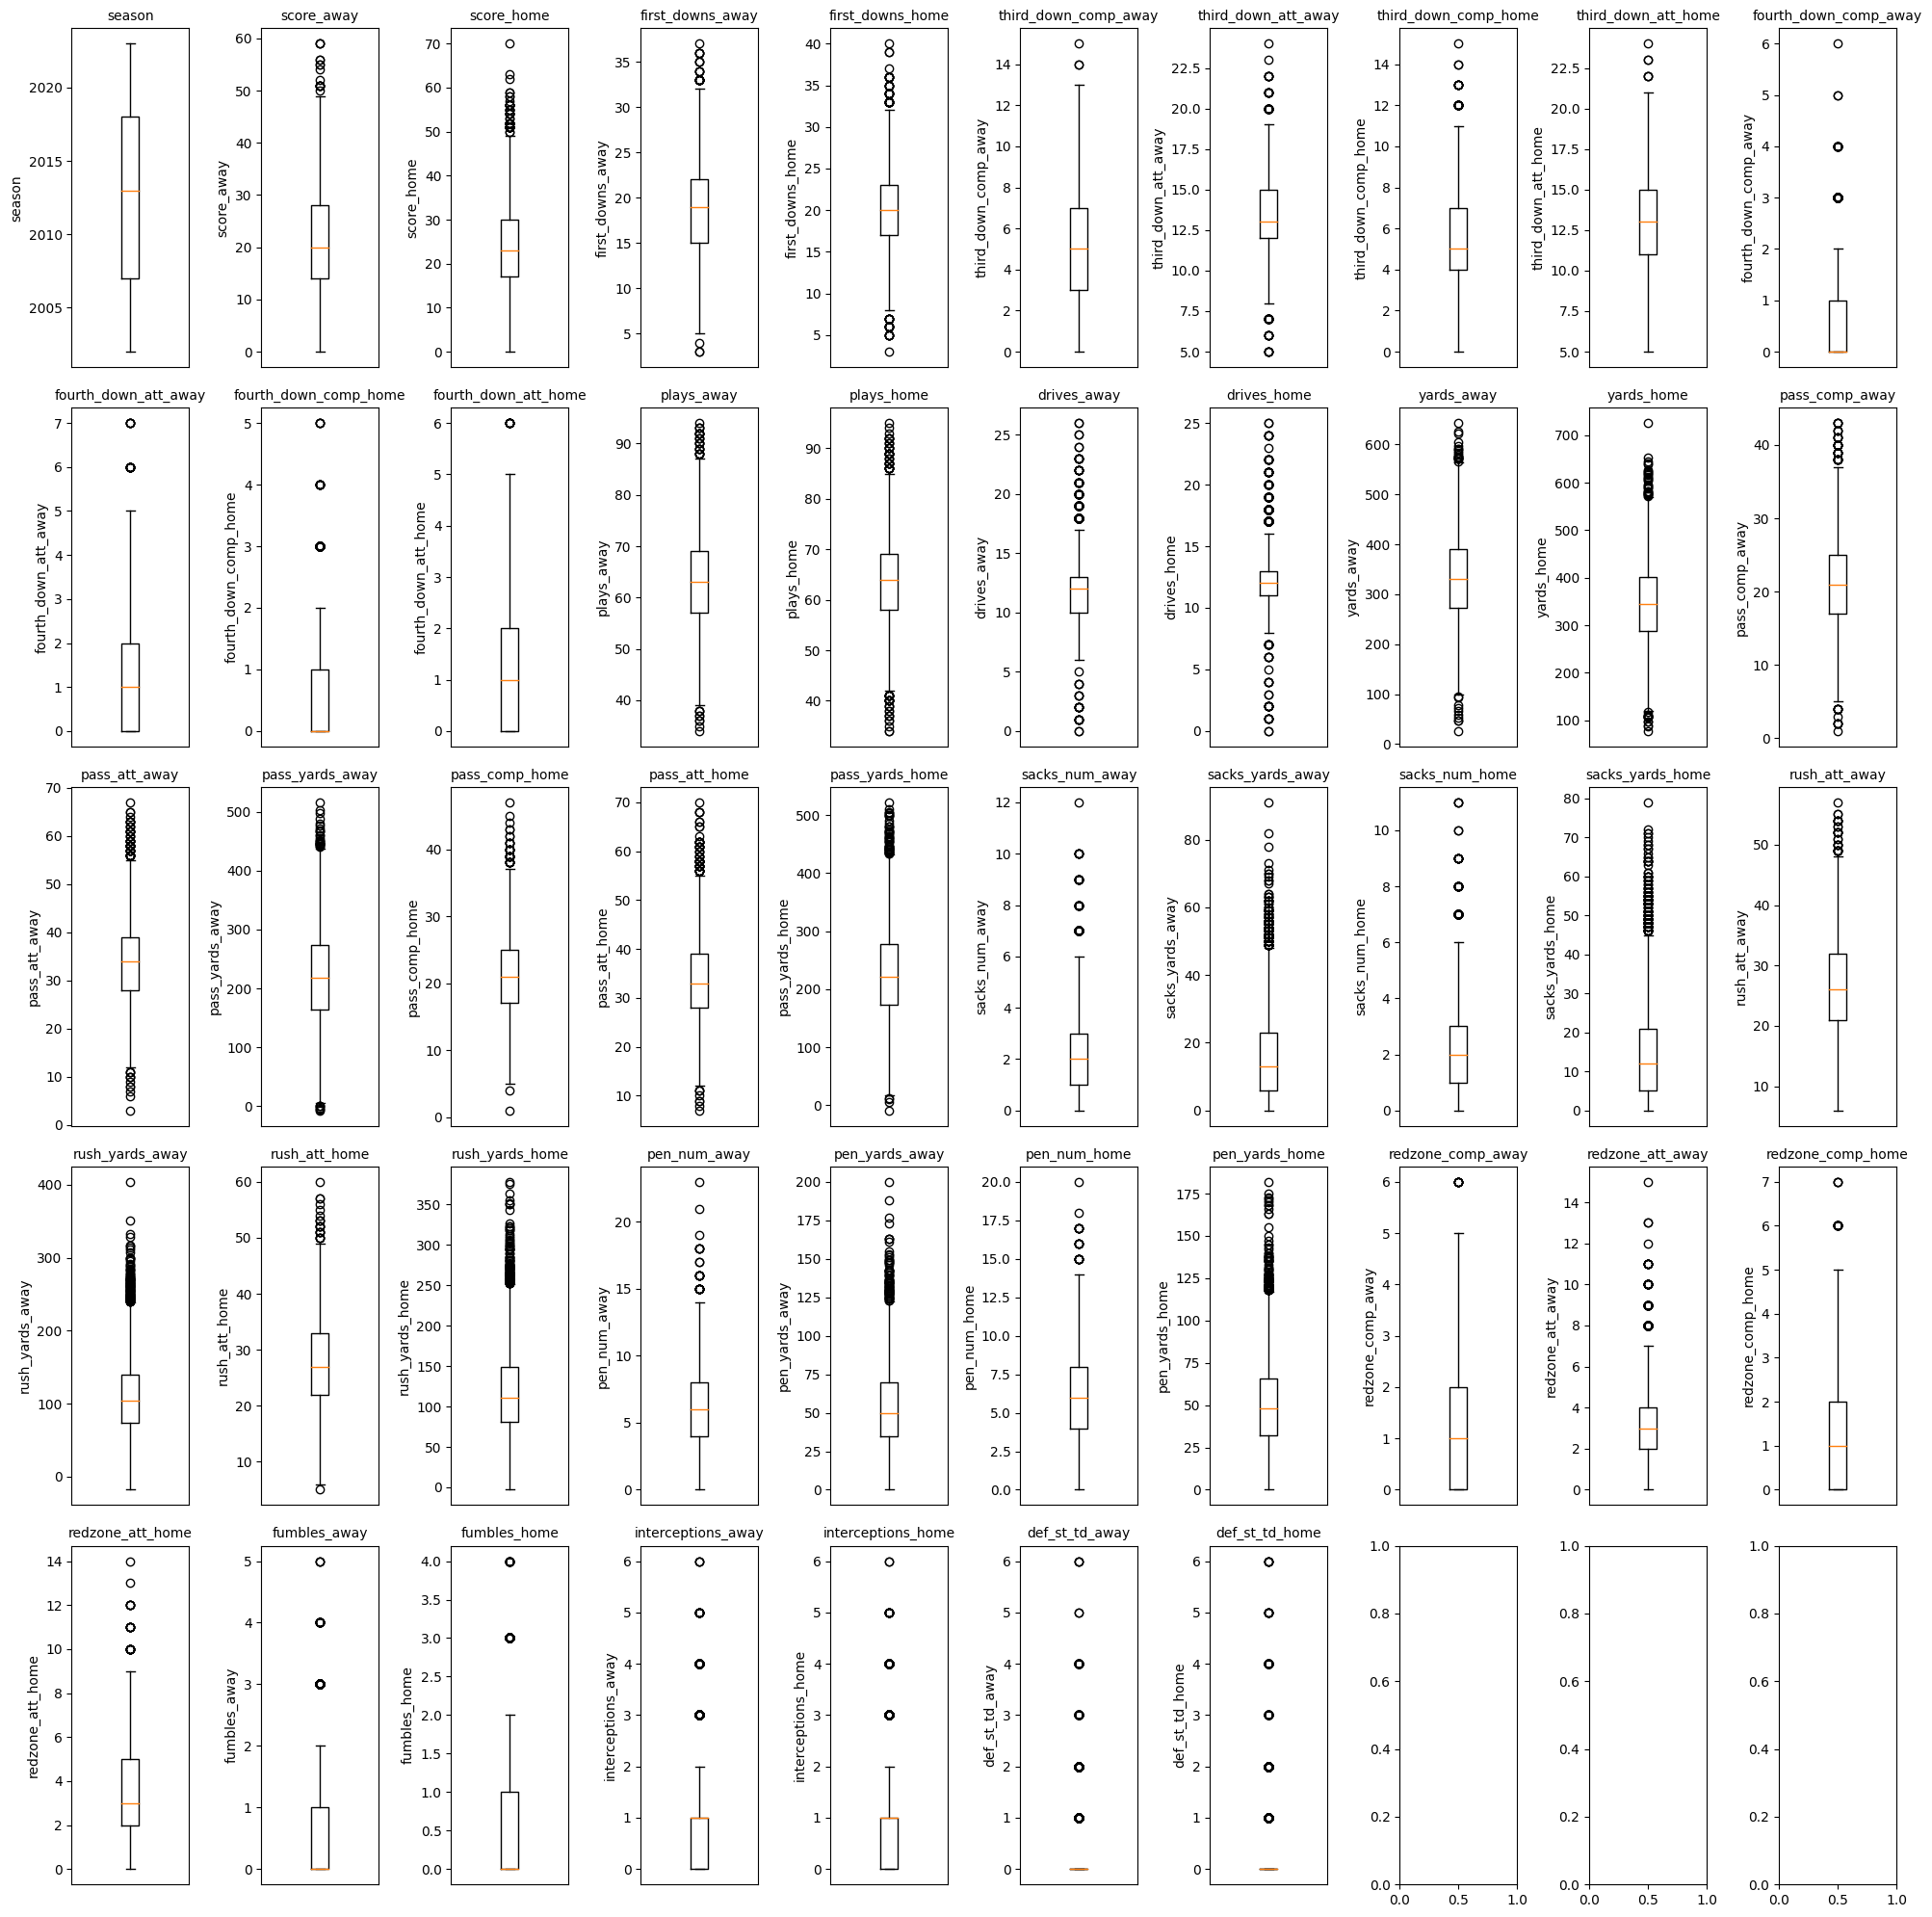

In [10]:
# Create a list of numerical columns
numeric_columns = nfl.select_dtypes(include=['int64']).columns

fig, axs = plt.subplots(5, 10, figsize=(20, 20))

axs = axs.flatten()

# Plot each numerical column
for i, column in enumerate(numeric_columns):
    ax = axs[i] 
    ax.boxplot(nfl[column], vert=True) 
    ax.set_title(column, fontsize=10) 
    ax.set_xticks([]) 
    ax.set_ylabel(column) 

plt.tight_layout()  
plt.show()

### Creating a binary outcome variable

In [11]:
# Create 'outcome_binary' column, where 1 indicates the home team won and 0 indicates the home team either lost or tied:
    
nfl['outcome_binary'] = np.where(nfl['score_home'] > nfl['score_away'], 1, 0)

# count the frequency of each unique value
nfl['outcome_binary'].value_counts()

outcome_binary
1    3344
0    2585
Name: count, dtype: int64

### Feature Engineering

In [12]:
# Create 'home_win' column
nfl['home_win'] = 'No'
nfl.loc[nfl['score_home'] > nfl['score_away'], 'home_win'] = 'Yes'
nfl.loc[nfl['score_home'] == nfl['score_away'], 'home_win'] = 'Tied'

# Create 'away_win' column
nfl['away_win'] = 'No'
nfl.loc[nfl['score_home'] < nfl['score_away'], 'away_win'] = 'Yes'
nfl.loc[nfl['score_home'] == nfl['score_away'], 'away_win'] = 'Tied'

# Create 'winner' column
nfl['winner'] = nfl['home'].where(nfl['home_win'] == 'Yes', nfl['away'])
nfl.loc[nfl['home_win'] == 'Tied', 'winner'] = 'Tie'

# Create 'winning_team' column
nfl['winning_team'] = nfl.apply(lambda row: 'home' if row['home_win'] == 'Yes' else ('away' if row['home_win'] == 'No' else 'tie'), axis=1)

In [13]:
# Create 'turnover_home' column
nfl['turnover_home'] = nfl['interceptions_home'] + nfl['fumbles_home']

# Create 'turnover_away' column
nfl['turnover_away'] = nfl['interceptions_away'] + nfl['fumbles_away']

In [14]:
# Third down conversion rates
nfl['third_down_rate_home'] = nfl['third_down_comp_home']/nfl['third_down_att_home']
nfl['third_down_rate_away'] = nfl['third_down_comp_away']/nfl['third_down_att_away']

# Fourth down conversion rates

nfl['fourth_down_rate_home'] = nfl.apply(lambda row: 0 if row['fourth_down_att_home'] == 0 
                                         else row['fourth_down_comp_home'] / row['fourth_down_att_home'], 
                                         axis=1)
nfl['fourth_down_rate_away'] = nfl.apply(lambda row: 0 if row['fourth_down_att_away'] == 0 
                                         else row['fourth_down_comp_away'] / row['fourth_down_att_away'], 
                                         axis=1)

In [15]:
# Calculate pass completion rate for the home and away team
nfl['pass_rate_home'] = nfl['pass_comp_home'] / nfl['pass_att_home']
nfl['pass_rate_away'] = nfl['pass_comp_away'] / nfl['pass_att_away'] 

In [16]:
# Calculate redzone conversion rate for the home and away team
nfl['redzone_rate_home'] = nfl['redzone_comp_home'] / nfl['redzone_att_home'] 
nfl['redzone_rate_away'] = nfl['redzone_comp_away'] / nfl['redzone_att_away'] 

In [17]:
# Calculate yards per attempt for passes and rushes
nfl['pass_yards_per_att_home'] = nfl['pass_yards_home'] / nfl['pass_att_home']
nfl['pass_yards_per_att_away'] = nfl['pass_yards_away'] / nfl['pass_att_away']
nfl['rush_yards_per_att_home'] = nfl['rush_yards_home'] / nfl['rush_att_home']
nfl['rush_yards_per_att_away'] = nfl['rush_yards_away'] / nfl['rush_att_away']

In [18]:
# Calculate the days of rest between games

nfl['date'] = pd.to_datetime(nfl['date'])
previous_game_date = {}

for index, row in nfl.iterrows():
    team = row['away']

    if team in previous_game_date:
        prev_game_date_away = previous_game_date[team]
        days_rest_away = (row['date'] - prev_game_date_away).days
        nfl.at[index, 'days_rest_away'] = days_rest_away
    previous_game_date[team] = row['date']
    
    team = row['home']
    
    if team in previous_game_date:
        prev_game_date_home = previous_game_date[team]
        days_rest_home = (row['date'] - prev_game_date_home).days
        nfl.at[index, 'days_rest_home'] = days_rest_home
    previous_game_date[team] = row['date']

nfl.loc[nfl['days_rest_away'].isna() | (nfl['days_rest_away'] > 12), 'days_rest_away'] = 14
nfl.loc[nfl['days_rest_home'].isna() | (nfl['days_rest_home'] > 12), 'days_rest_home'] = 14

#### Divisional Games

In [19]:
# set divisions
divisions = ['nfc_east', 'nfc_north', 'nfc_west', 'nfc_south','afc_east', 'afc_north', 'afc_west', 'afc_south']
nfc_east = ['Eagles', 'Cowboys', 'Giants', 'Commanders']
nfc_north = ['Lions', 'Bears', 'Vikings', 'Packers']
nfc_west = ['49ers', 'Cardinals', 'Rams', 'Seahawks']
nfc_south = ['Saints', 'Falcons', 'Panthers', 'Buccaneers']
afc_east = ['Patriots', 'Jets', 'Bills', 'Dolphins']
afc_north = ['Ravens', 'Browns', 'Bengals', 'Steelers']
afc_west = ['Chiefs', 'Broncos', 'Raiders', 'Chargers']
afc_south = ['Colts', 'Texans', 'Titans', 'Jaguars']

In [20]:
# Create an empty dataframe to store divisional games
divisional_games = pd.DataFrame(columns=nfl.columns)

# Loop through each division
for division in divisions:
    teams_in_division = globals()[division]
    for index, row in nfl.iterrows():
        home_team = row['home']
        away_team = row['away']
        if home_team in teams_in_division and away_team in teams_in_division:
            divisional_games = pd.concat([divisional_games, pd.DataFrame(row).T], ignore_index=True)

divisional_games.shape

(2142, 74)

In [21]:
# Add a new column for the division of the 'home' team
divisional_games['division'] = ''

# Loop through each row in divisional_games
for index, row in divisional_games.iterrows():
    home_team = row['home']
    for division, teams in zip(divisions, [nfc_east, nfc_north, nfc_west, nfc_south, afc_east, afc_north, afc_west, afc_south]):
        if home_team in teams:
            divisional_games.at[index, 'division'] = division
            break  # Break the loop once the division is found

divisional_games.shape

(2142, 75)

In [22]:
# Create an empty dataframe to store non-divisional games
non_divisional_games = pd.DataFrame(columns=nfl.columns)

# Loop through each division
for division in divisions:
    teams_in_division = globals()[division]
    for index, row in nfl.iterrows():
        home_team = row['home']
        away_team = row['away']
        if home_team in teams_in_division and away_team not in teams_in_division:
            non_divisional_games = pd.concat([non_divisional_games, pd.DataFrame(row).T], ignore_index=True)

non_divisional_games.shape

(3787, 74)

### Time Data Transformation

In [23]:
# Convert time string to seconds
def time_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

# Apply the function to convert time strings to seconds
nfl['possession_away_seconds'] = nfl['possession_away'].apply(time_to_seconds)
nfl['possession_home_seconds'] = nfl['possession_home'].apply(time_to_seconds)

In [24]:
nfl.head()

season week       date      away     home  score_away  score_home  \
0    2002    1 2002-09-05     49ers   Giants          16          13   
1    2002    1 2002-09-08      Jets    Bills          37          31   
2    2002    1 2002-09-08   Vikings    Bears          23          27   
3    2002    1 2002-09-08  Chargers  Bengals          34           6   
4    2002    1 2002-09-08    Chiefs   Browns          40          39   

   first_downs_away  first_downs_home  third_down_comp_away  ...  \
0                13                21                     4  ...   
1                18                26                     2  ...   
2                19                20                     5  ...   
3                27                13                     6  ...   
4                24                24                     5  ...   

   redzone_rate_home  redzone_rate_away  pass_yards_per_att_home  \
0                0.0                0.0                 7.066667   
1                0.0                0.0                 6.205128   
2                0.0                0.0                 8.727273   
3                0.0                0.0                 5.387097   
4                0.0                0.0                 8.800000   

   pass_yards_per_att_away  rush_yards_per_att_home  rush_yards_per_att_away  \
0                 6.384615                 1.954545                 4.520000   
1                 6.433333                 4.437500                 5.214286   
2                 8.142857                 3.076923                 4.242424   
3                 8.421053                 2.769231                 5.355556   
4                 9.517241                 2.950000                 6.466667   

   days_rest_away  days_rest_home  possession_away_seconds  \
0            14.0            14.0                     1652   
1            14.0            14.0                     1266   
2            14.0            14.0                     1891   
3            14.0            14.0                     2268   
4            14.0            14.0                     1816   

   possession_home_seconds  
0                     1948  
1                     2348  
2                     1709  
3                     1332  
4                     1784  

[5 rows x 76 columns]

# Exploratory Data Analysis

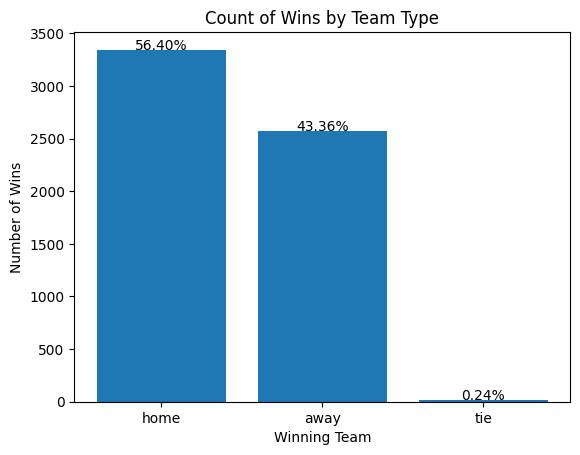

In [25]:
# Count occurrences of each value in the 'winning_team' column
winning_team_counts = nfl['winning_team'].value_counts()

# Calculate percentages
total_games = winning_team_counts.sum()
percentages = (winning_team_counts / total_games) * 100

# Plot the bar plot
plt.bar(winning_team_counts.index, winning_team_counts.values)

# Add labels and title
plt.xlabel('Winning Team')
plt.ylabel('Number of Wins')
plt.title('Count of Wins by Team Type')

# Annotate bars with percentages
for i, percentage in enumerate(percentages):
    plt.text(i, winning_team_counts[i] + 0.5, f'{percentage:.2f}%', ha='center')

# Show the plot
plt.show()


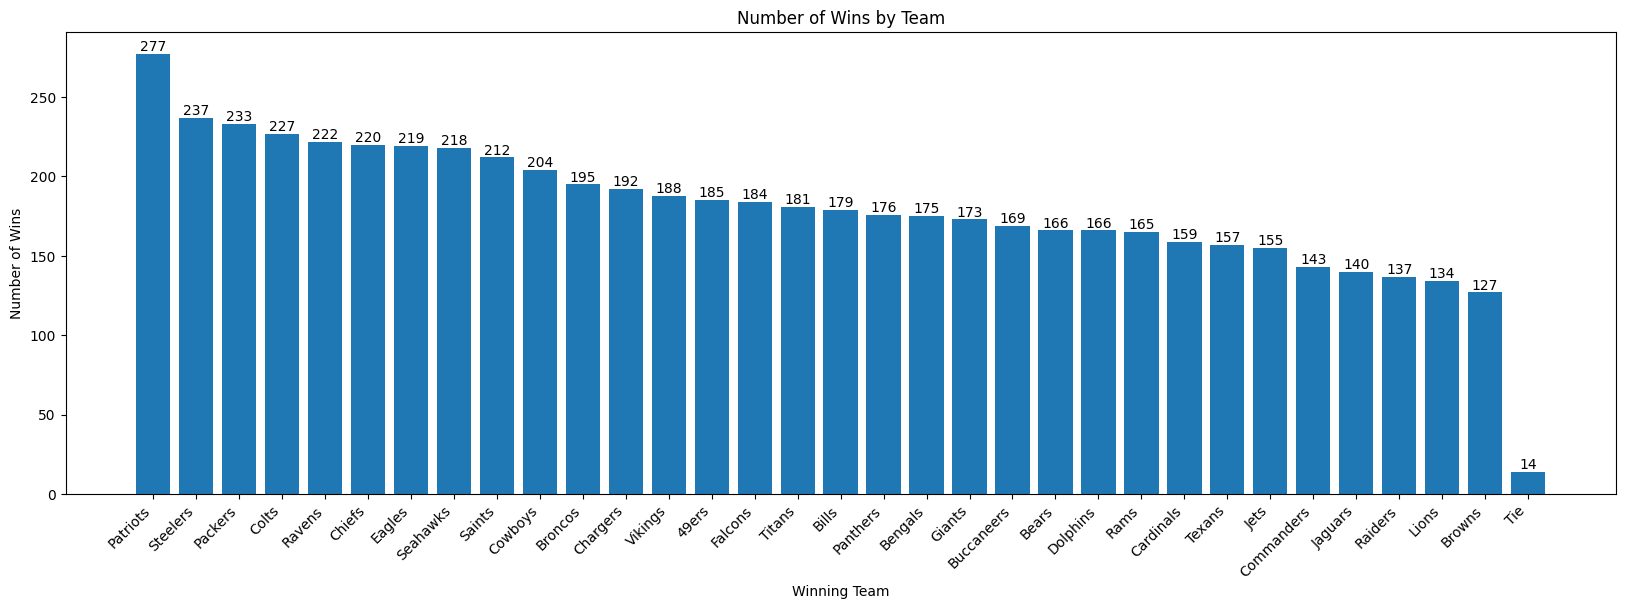

In [26]:
# Set the figure size
plt.figure(figsize=(20, 6))

# Count occurrences of each value in the 'winner' column
winner_counts = nfl['winner'].value_counts()

# Plot the bar plot
bars = plt.bar(winner_counts.index, winner_counts.values)

# Add labels for each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), 
             ha='center', va='bottom')

# Add labels and title
plt.xlabel('Winning Team')
plt.ylabel('Number of Wins')
plt.title('Number of Wins by Team')

# Rotate team names diagonally
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

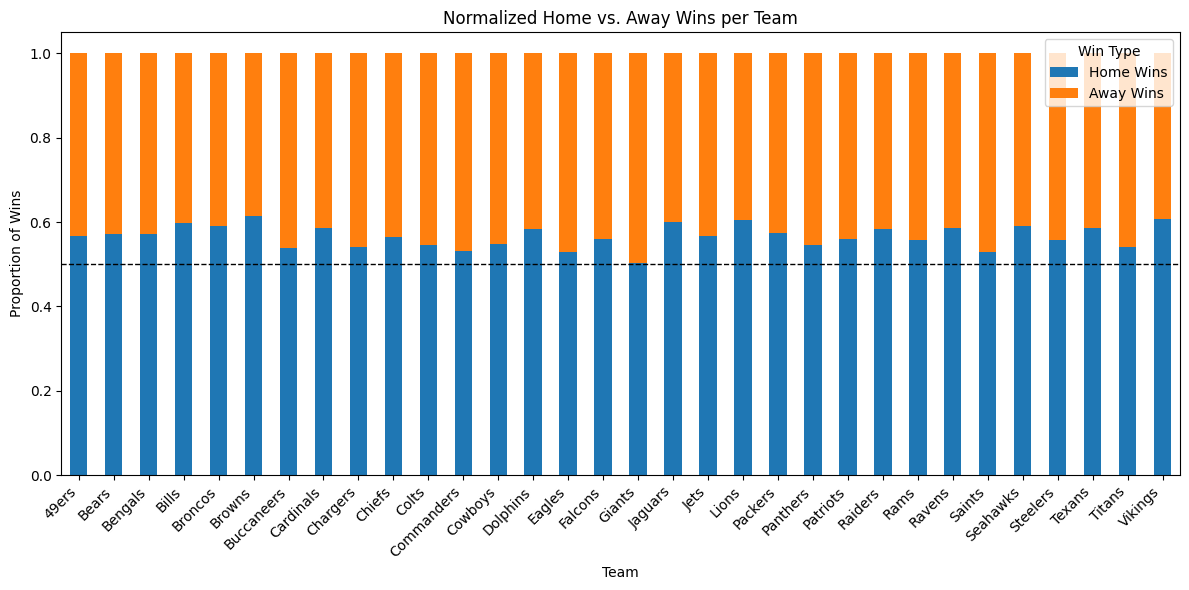

In [27]:
# Calculate total home and away wins
home_wins = nfl[nfl['home_win'] == 'Yes']['winner'].value_counts()
away_wins = nfl[nfl['home_win'] == 'No']['winner'].value_counts()

# Combine into a DataFrame
wins_df = pd.DataFrame({'Home Wins': home_wins, 'Away Wins': away_wins}).fillna(0)

# Normalize the data
wins_df_normalized = wins_df.div(wins_df.sum(axis=1), axis=0)

# Plot the normalized bar chart
ax = wins_df_normalized.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add labels and title
plt.xlabel('Team')
plt.ylabel('Proportion of Wins')
plt.title('Normalized Home vs. Away Wins per Team')

ax.axhline(y=0.5, color='black', linestyle='--', linewidth=1)

# Show the plot
plt.legend(title='Win Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The next 3 visualizations are iterations of https://www.kaggle.com/code/kerneler/starter-nfl-team-stats-2002-2019-27043d62-f 

In [28]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = math.ceil((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [30]:
def plotCorrelationMatrix(df, graphWidth, plot_title):
    numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
    if numeric_df.shape[1] < 2:
        print(f'No correlation plots shown: The number of numeric columns ({numeric_df.shape[1]}) is less than 2')
        return
    corr = numeric_df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {plot_title}', fontsize=15)
    plt.show()

In [31]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. = %.3f' % corrs[i, j], (0.65, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

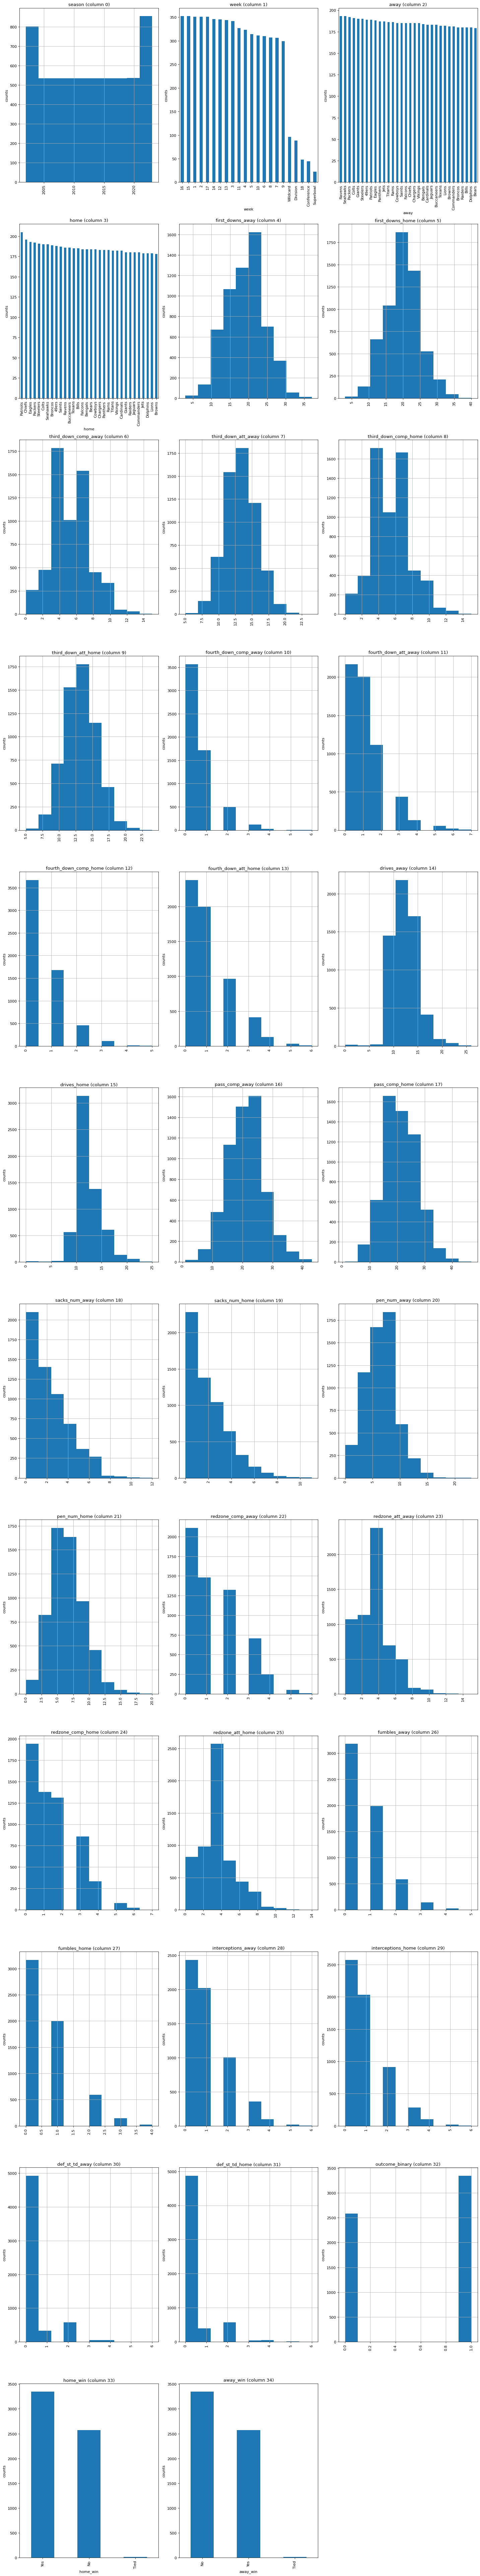

In [32]:
plotPerColumnDistribution(nfl, 35, 3)

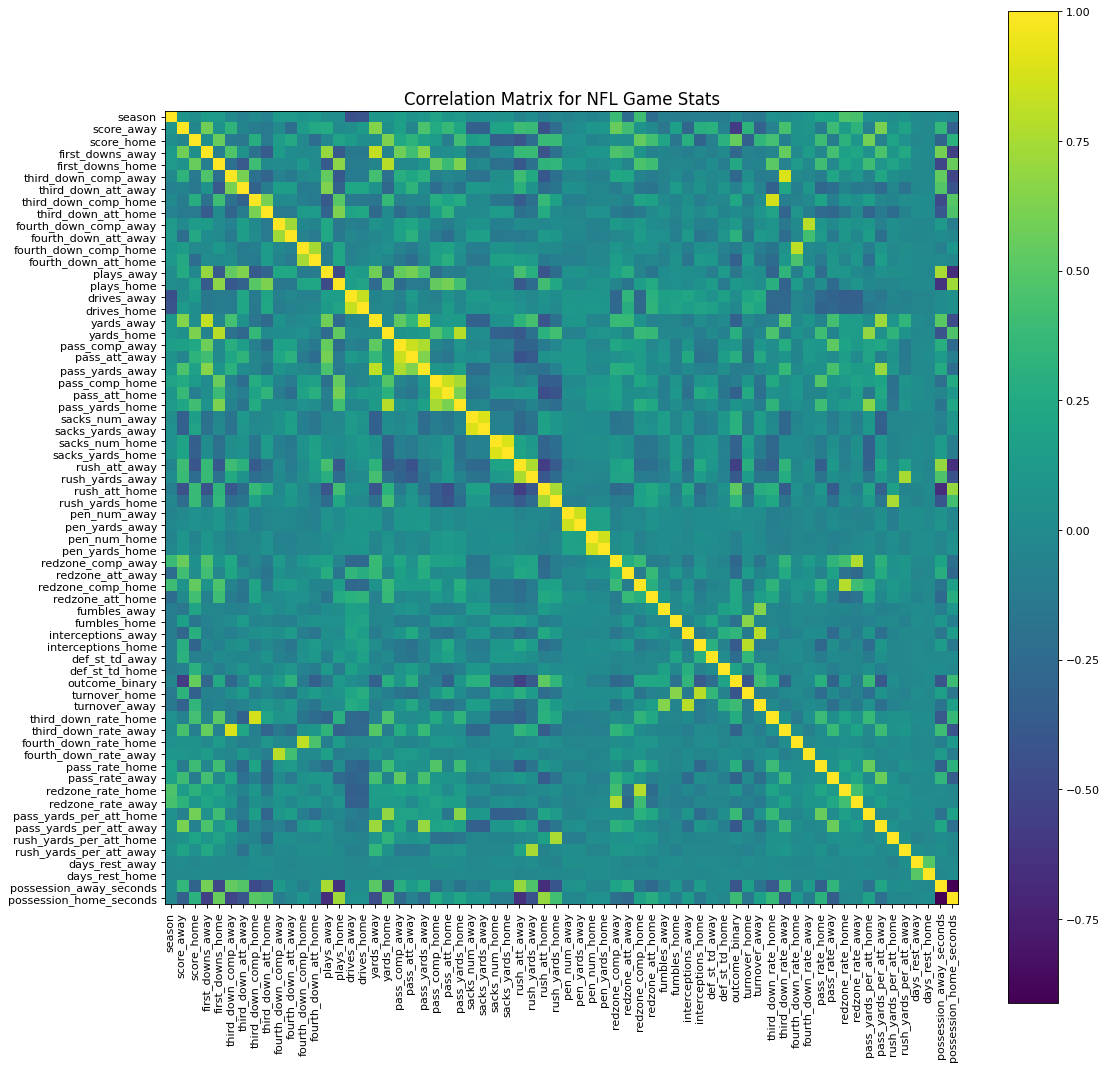

In [33]:
plotCorrelationMatrix(nfl, 16, "NFL Game Stats")

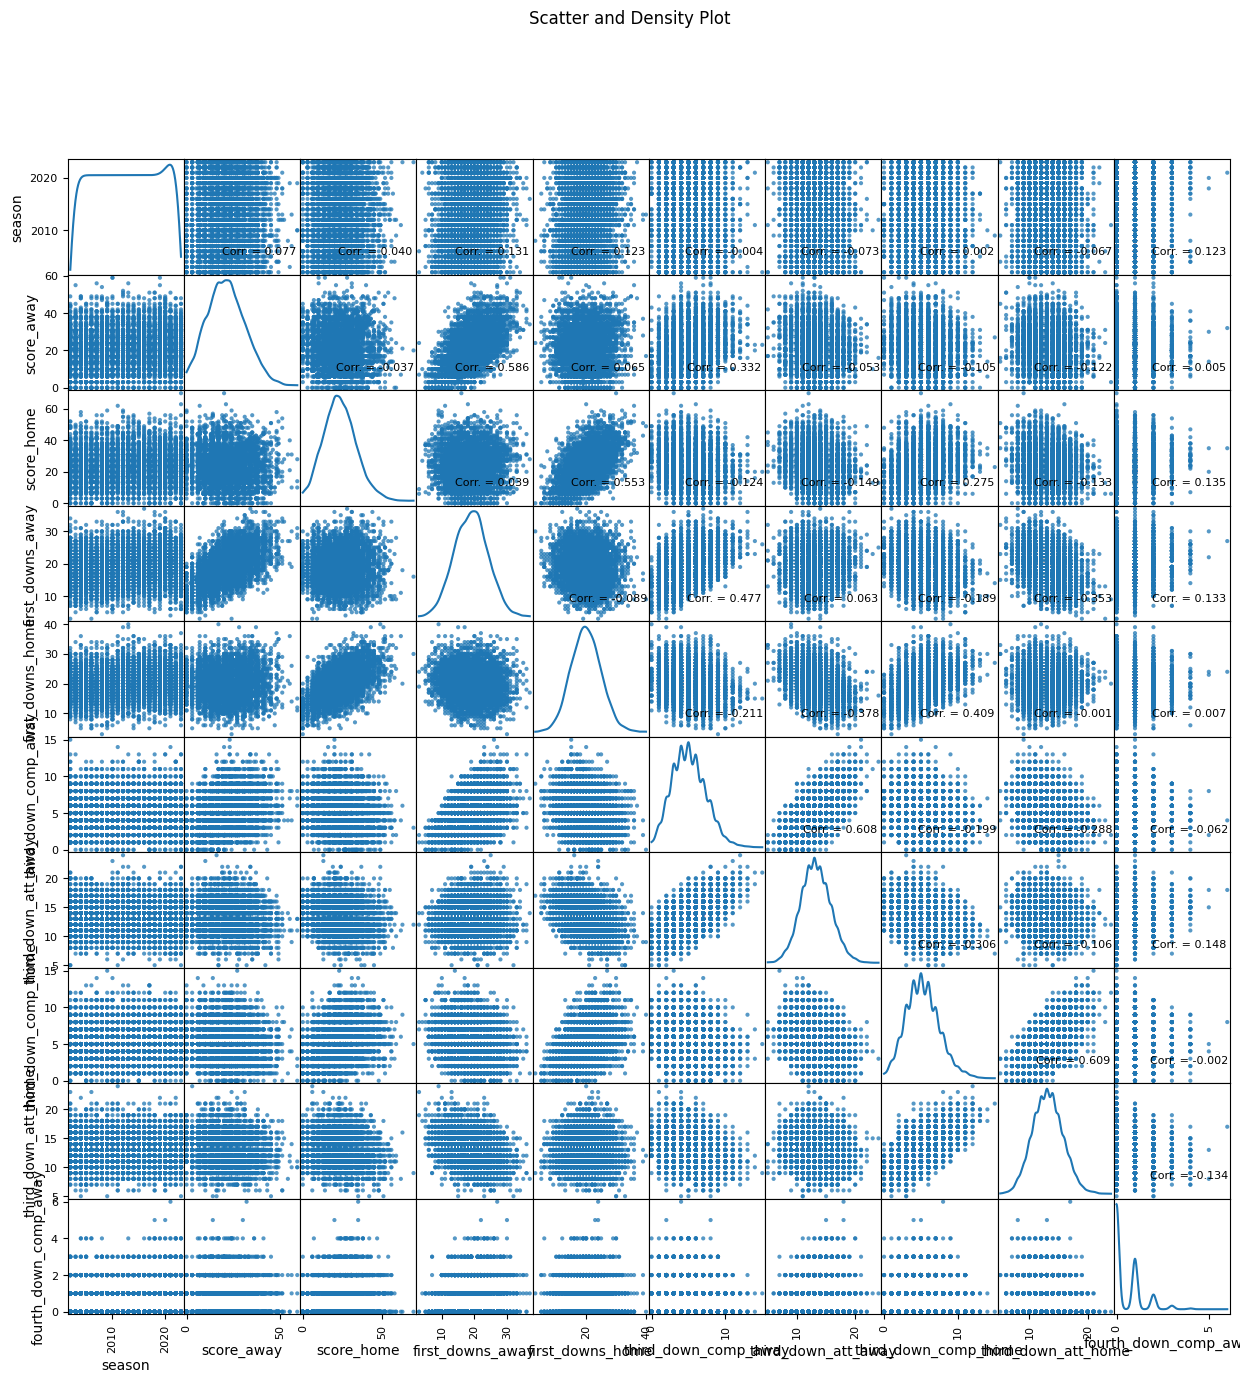

In [34]:
plotScatterMatrix(nfl, 15, 8)

A look into the connections between yards and scoring:

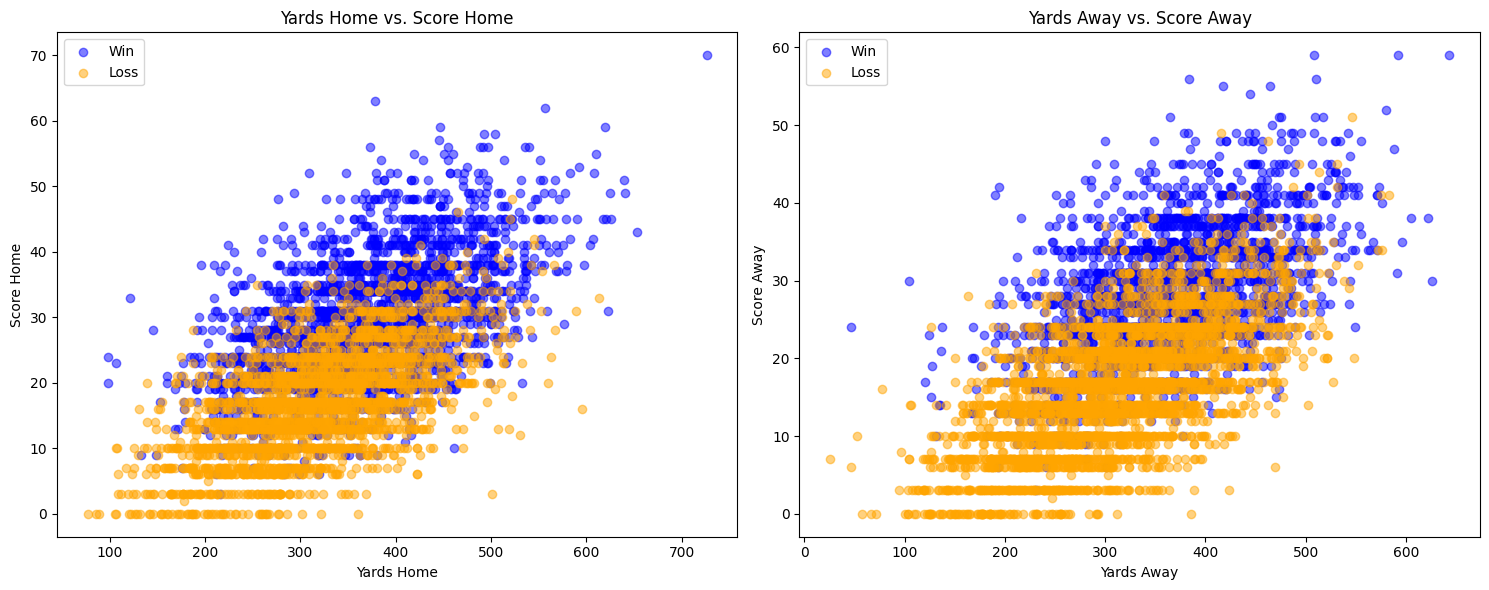

In [35]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for yards_home vs. score_home
for outcome, color in [('Yes', 'blue'), ('No', 'orange')]:
    axes[0].scatter(nfl[nfl['home_win'] == outcome]['yards_home'], 
                    nfl[nfl['home_win'] == outcome]['score_home'], 
                    color=color, alpha=0.5, label= 'Win' if outcome == 'Yes' else 'Loss')

axes[0].set_xlabel('Yards Home')
axes[0].set_ylabel('Score Home')
axes[0].set_title('Yards Home vs. Score Home')
axes[0].legend()

# Scatter plot for yards_away vs. score_away
for outcome, color in [('Yes', 'blue'), ('No', 'orange')]:
    axes[1].scatter(nfl[nfl['away_win'] == outcome]['yards_away'], 
                    nfl[nfl['away_win'] == outcome]['score_away'], 
                    color=color, alpha=0.5, label= 'Win' if outcome == 'Yes' else 'Loss')

axes[1].set_xlabel('Yards Away')
axes[1].set_ylabel('Score Away')
axes[1].set_title('Yards Away vs. Score Away')
axes[1].legend()

# Show the plot
plt.tight_layout()
plt.show()


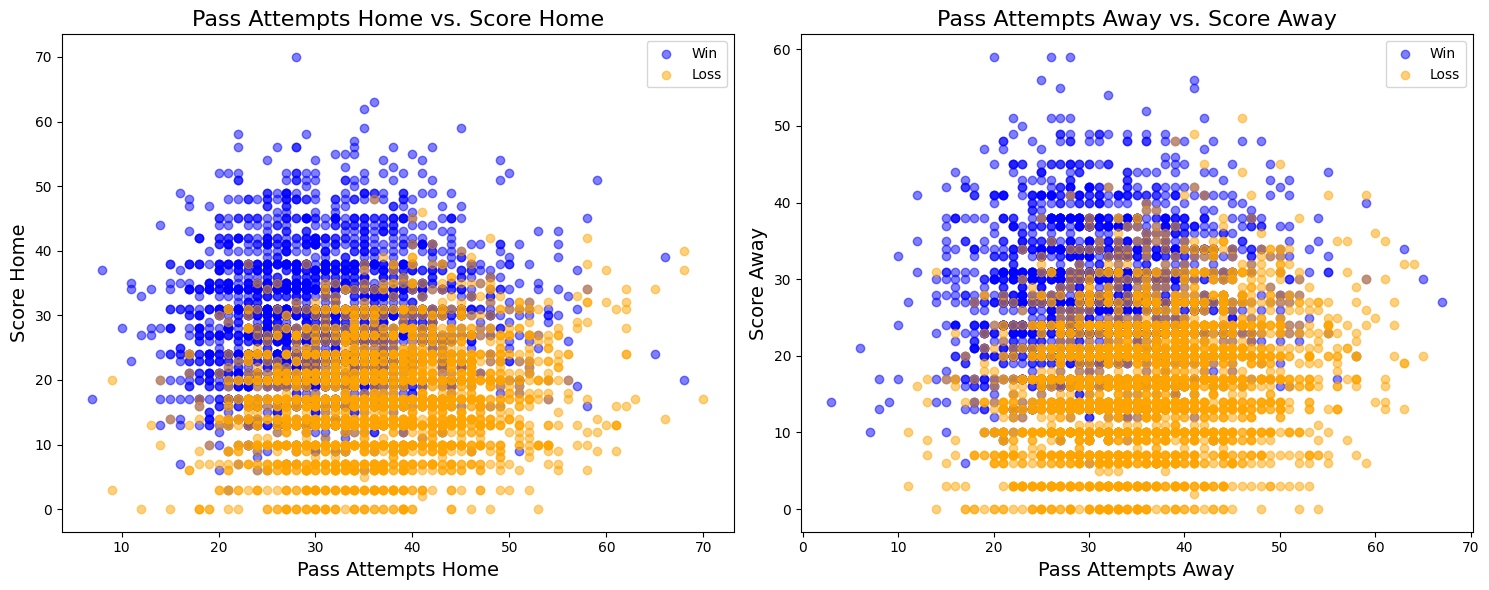

In [36]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for pass_att_home vs. score_home
for outcome, color in [('Yes', 'blue'), ('No', 'orange')]:
    axes[0].scatter(nfl[nfl['home_win'] == outcome]['pass_att_home'], 
                    nfl[nfl['home_win'] == outcome]['score_home'], 
                    color=color, alpha=0.5, label='Win' if outcome == 'Yes' else 'Loss')

axes[0].set_xlabel('Pass Attempts Home', fontsize=14)
axes[0].set_ylabel('Score Home', fontsize=14)
axes[0].set_title('Pass Attempts Home vs. Score Home', fontsize=16)
axes[0].legend()

# Scatter plot for pass_att_away vs. score_away
for outcome, color in [('Yes', 'blue'), ('No', 'orange')]:
    axes[1].scatter(nfl[nfl['away_win'] == outcome]['pass_att_away'], 
                    nfl[nfl['away_win'] == outcome]['score_away'], 
                    color=color, alpha=0.5, label='Win' if outcome == 'Yes' else 'Loss')

axes[1].set_xlabel('Pass Attempts Away', fontsize=14)
axes[1].set_ylabel('Score Away', fontsize=14)
axes[1].set_title('Pass Attempts Away vs. Score Away', fontsize=16)
axes[1].legend()

# Show the plot
plt.tight_layout()
plt.show()


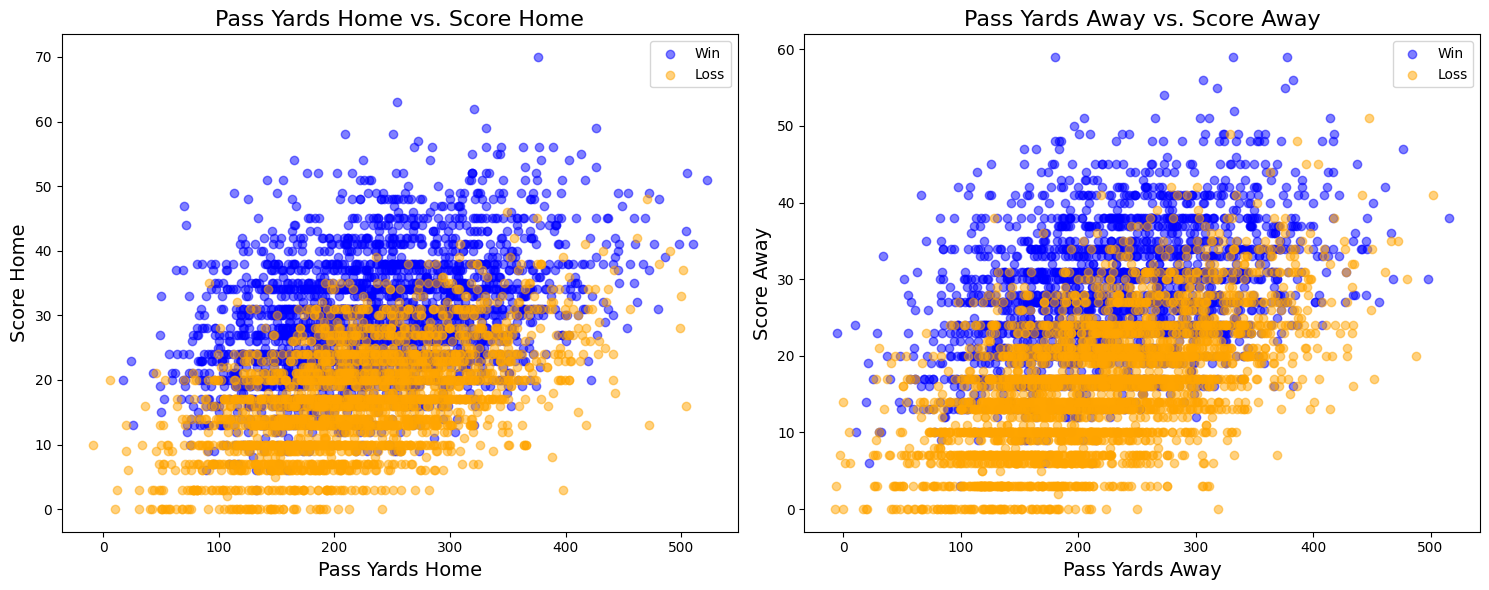

In [37]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for pass_yards_home vs. score_home
for outcome, color in [('Yes', 'blue'), ('No', 'orange')]:
    axes[0].scatter(nfl[nfl['home_win'] == outcome]['pass_yards_home'], 
                    nfl[nfl['home_win'] == outcome]['score_home'], 
                    color=color, alpha=0.5, label='Win' if outcome == 'Yes' else 'Loss')

axes[0].set_xlabel('Pass Yards Home', fontsize=14)
axes[0].set_ylabel('Score Home', fontsize=14)
axes[0].set_title('Pass Yards Home vs. Score Home', fontsize=16)
axes[0].legend()

# Scatter plot for pass_yards_away vs. score_away
for outcome, color in [('Yes', 'blue'), ('No', 'orange')]:
    axes[1].scatter(nfl[nfl['away_win'] == outcome]['pass_yards_away'], 
                    nfl[nfl['away_win'] == outcome]['score_away'], 
                    color=color, alpha=0.5, label='Win' if outcome == 'Yes' else 'Loss')

axes[1].set_xlabel('Pass Yards Away', fontsize=14)
axes[1].set_ylabel('Score Away', fontsize=14)
axes[1].set_title('Pass Yards Away vs. Score Away', fontsize=16)
axes[1].legend()

# Show the plot
plt.tight_layout()
plt.show()


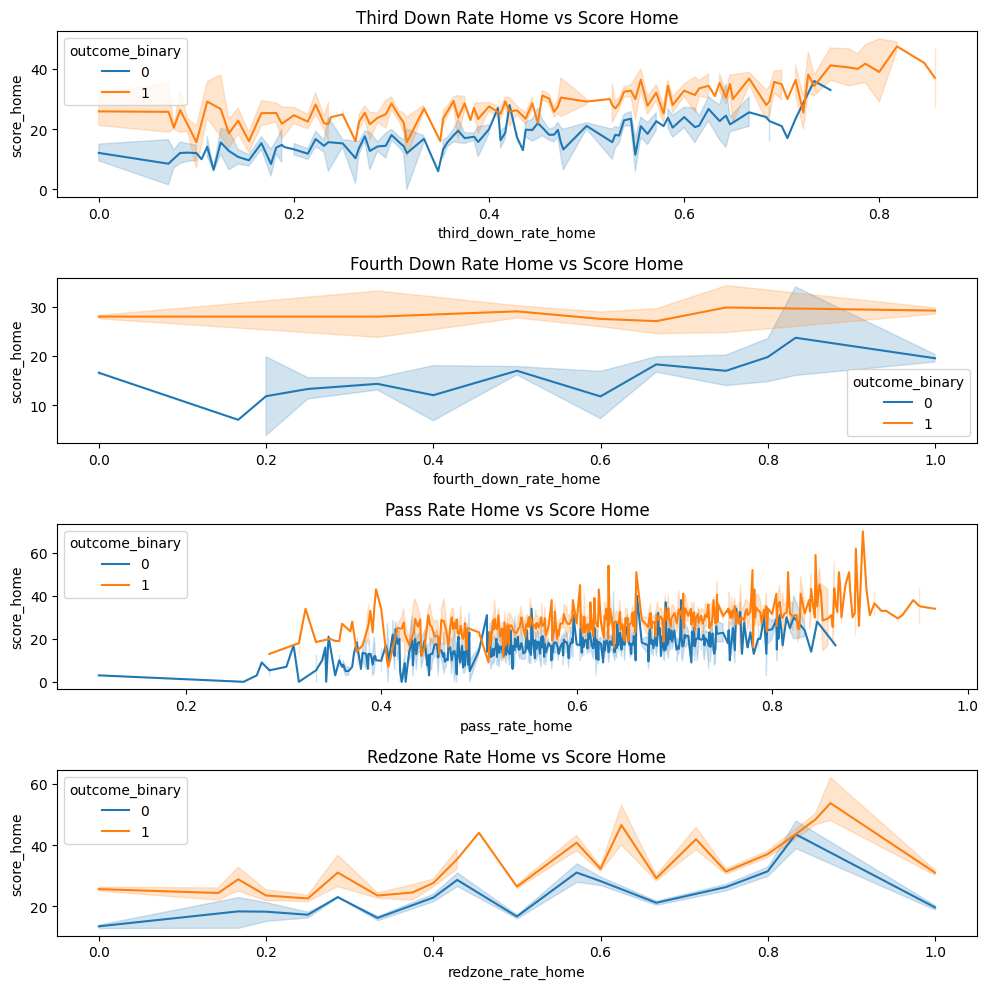

In [38]:
# Create subplots with 4 rows and 1 column
fig, axes = plt.subplots(4, 1, figsize=(10, 10))

def plot_line(ax, data, x_col, y_col, hue_col, title):
    sns.lineplot(data=data, x=x_col, y=y_col, hue=hue_col, ax=ax)
    ax.set_title(title)
    
# Line plot for third down rate
plot_line(axes[0], nfl, 'third_down_rate_home', 'score_home', 'outcome_binary', 'Third Down Rate Home vs Score Home')

# Line plot for fourth down rate
plot_line(axes[1], nfl, 'fourth_down_rate_home', 'score_home', 'outcome_binary', 'Fourth Down Rate Home vs Score Home')

# Line plot for pass rate
plot_line(axes[2], nfl, 'pass_rate_home', 'score_home', 'outcome_binary', 'Pass Rate Home vs Score Home')

# Line plot for redzone rate
plot_line(axes[3], nfl, 'redzone_rate_home', 'score_home', 'outcome_binary', 'Redzone Rate Home vs Score Home')

plt.tight_layout()
plt.show()


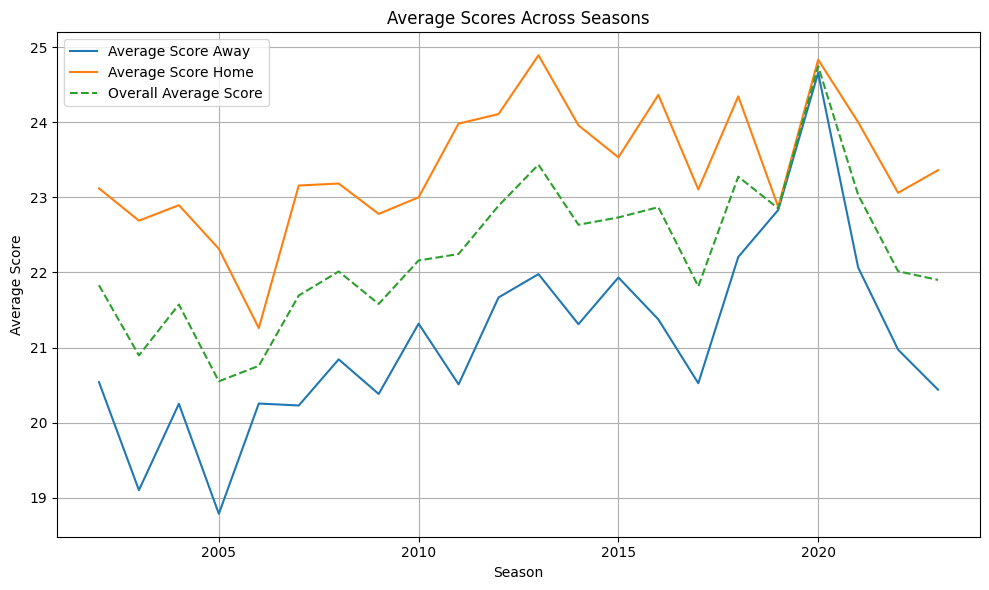

In [39]:
# Calculate average score_away and score_home for each season
avg_score_away = nfl.groupby('season')['score_away'].mean()
avg_score_home = nfl.groupby('season')['score_home'].mean()

# Calculate overall average of score_away and score_home
avg_score_total = (avg_score_away + avg_score_home) / 2

# Plot the lines
plt.figure(figsize=(10, 6))
plt.plot(avg_score_away.index, avg_score_away, label='Average Score Away')
plt.plot(avg_score_home.index, avg_score_home, label='Average Score Home')
plt.plot(avg_score_total.index, avg_score_total, label='Overall Average Score', linestyle='--')

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Average Score')
plt.title('Average Scores Across Seasons')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

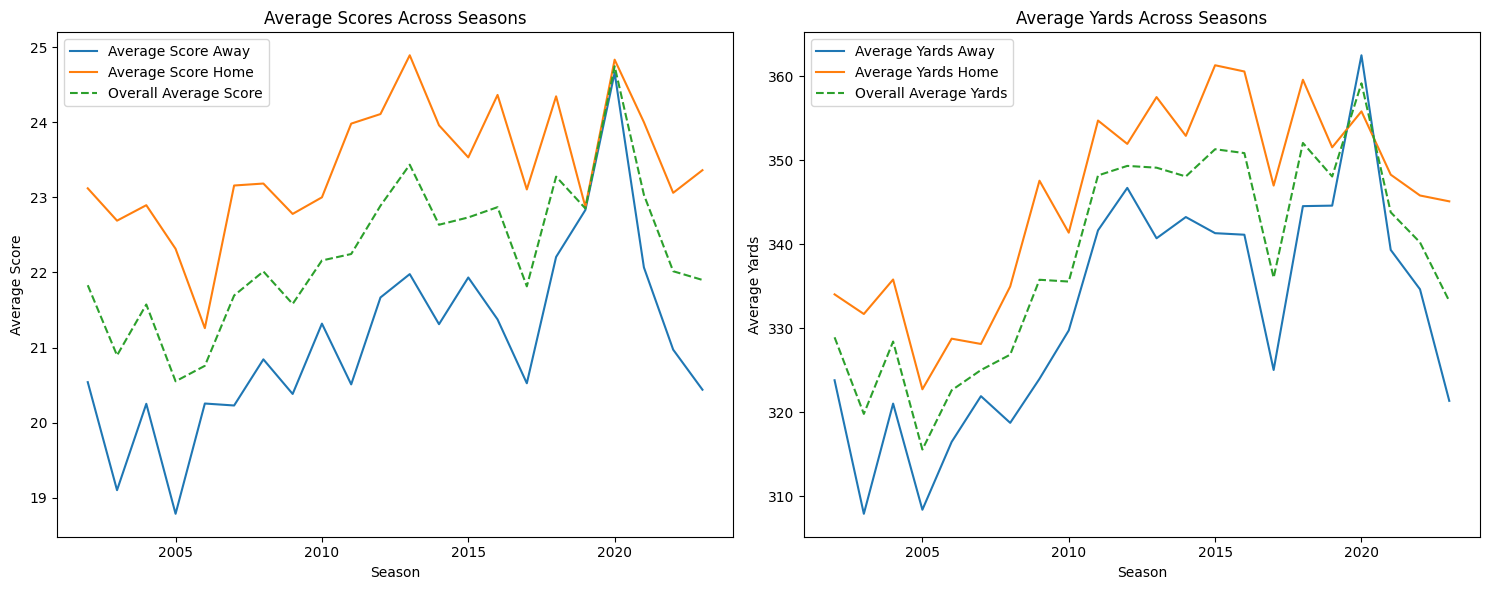

In [40]:
# Calculate average score_away, score_home, and average total score for each season
avg_score_away = nfl.groupby('season')['score_away'].mean()
avg_score_home = nfl.groupby('season')['score_home'].mean()
avg_score_total = (avg_score_away + avg_score_home) / 2

# Calculate average yards_away, yards_home, and average total yards for each season
avg_yards_away = nfl.groupby('season')['yards_away'].mean()
avg_yards_home = nfl.groupby('season')['yards_home'].mean()
avg_yards_total = (avg_yards_away + avg_yards_home) / 2

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for scores
axes[0].plot(avg_score_away.index, avg_score_away, label='Average Score Away')
axes[0].plot(avg_score_home.index, avg_score_home, label='Average Score Home')
axes[0].plot(avg_score_total.index, avg_score_total, label='Overall Average Score', linestyle='--')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Average Score')
axes[0].set_title('Average Scores Across Seasons')
axes[0].legend()

# Plot for yards
axes[1].plot(avg_yards_away.index, avg_yards_away, label='Average Yards Away')
axes[1].plot(avg_yards_home.index, avg_yards_home, label='Average Yards Home')
axes[1].plot(avg_yards_total.index, avg_yards_total, label='Overall Average Yards', linestyle='--')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Average Yards')
axes[1].set_title('Average Yards Across Seasons')
axes[1].legend()

# Show the plot
plt.tight_layout()
plt.show()

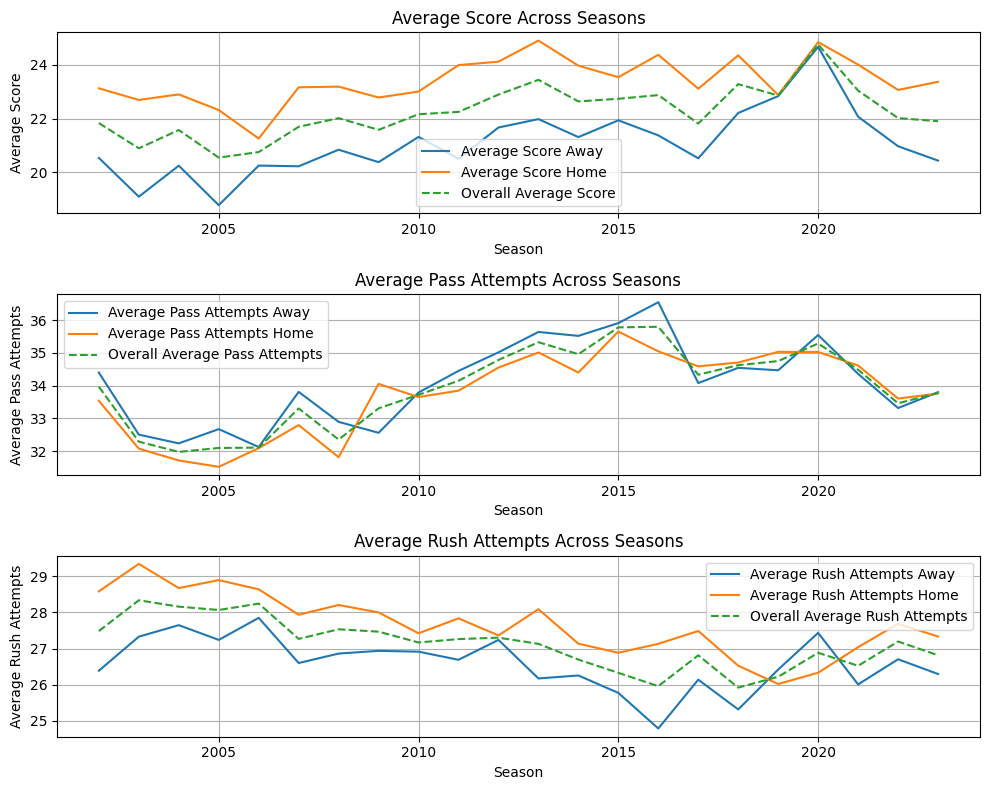

In [41]:
# Create subplots for scores and pass attempts
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

# Calculate average scores for each season
avg_score_away = nfl.groupby('season')['score_away'].mean()
avg_score_home = nfl.groupby('season')['score_home'].mean()
avg_score_total = (avg_score_away + avg_score_home) / 2

# Plot for scores
axes[0].plot(avg_score_away.index, avg_score_away, label='Average Score Away')
axes[0].plot(avg_score_home.index, avg_score_home, label='Average Score Home')
axes[0].plot(avg_score_total.index, avg_score_total, label='Overall Average Score', linestyle='--')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Average Score')
axes[0].set_title('Average Score Across Seasons')
axes[0].legend()
axes[0].grid(True)

# Calculate average pass attempts for each season
avg_pass_att_away = nfl.groupby('season')['pass_att_away'].mean()
avg_pass_att_home = nfl.groupby('season')['pass_att_home'].mean()
avg_pass_att_total = (avg_pass_att_away + avg_pass_att_home) / 2

# Plot for pass attempts
axes[1].plot(avg_pass_att_away.index, avg_pass_att_away, label='Average Pass Attempts Away')
axes[1].plot(avg_pass_att_home.index, avg_pass_att_home, label='Average Pass Attempts Home')
axes[1].plot(avg_pass_att_total.index, avg_pass_att_total, label='Overall Average Pass Attempts', linestyle='--')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Average Pass Attempts')
axes[1].set_title('Average Pass Attempts Across Seasons')
axes[1].legend()
axes[1].grid(True)

# Calculate average pass attempts for each season
avg_rush_att_away = nfl.groupby('season')['rush_att_away'].mean()
avg_rush_att_home = nfl.groupby('season')['rush_att_home'].mean()
avg_rush_att_total = (avg_rush_att_away + avg_rush_att_home) / 2

# Plot for pass attempts
axes[2].plot(avg_rush_att_away.index, avg_rush_att_away, label='Average Rush Attempts Away')
axes[2].plot(avg_rush_att_home.index, avg_rush_att_home, label='Average Rush Attempts Home')
axes[2].plot(avg_rush_att_total.index, avg_rush_att_total, label='Overall Average Rush Attempts', linestyle='--')
axes[2].set_xlabel('Season')
axes[2].set_ylabel('Average Rush Attempts')
axes[2].set_title('Average Rush Attempts Across Seasons')
axes[2].legend()
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

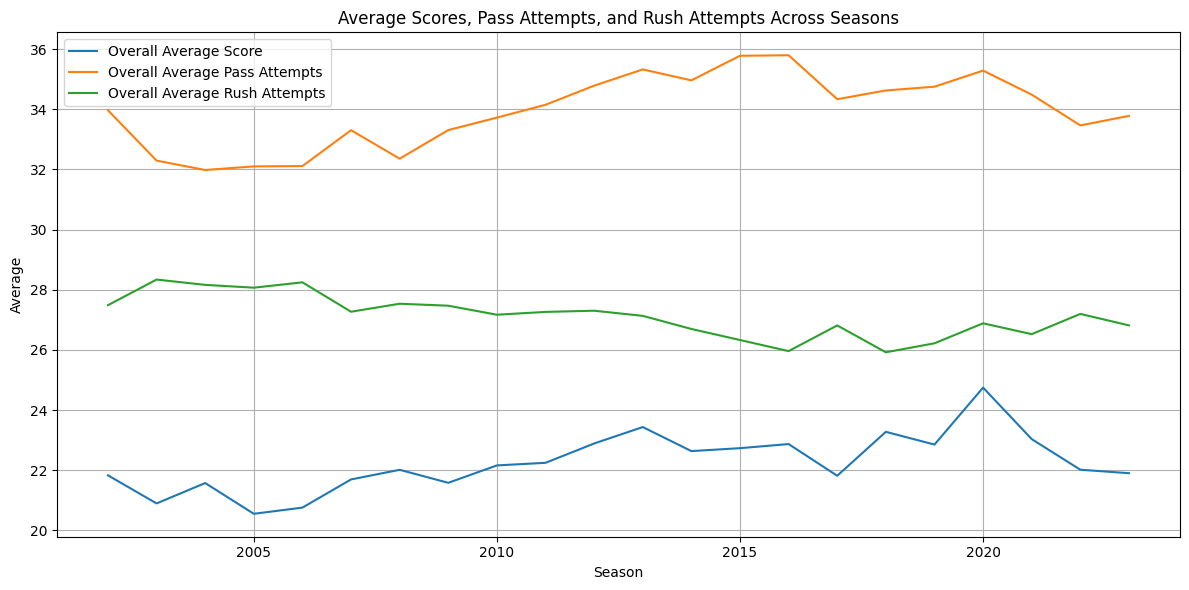

In [42]:
# Create subplots for scores, pass attempts, and rush attempts
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

# Plot for scores
axes.plot(avg_score_total.index, avg_score_total, label='Overall Average Score')

# Plot for pass attempts
axes.plot(avg_pass_att_total.index, avg_pass_att_total, label='Overall Average Pass Attempts')

# Plot for rush attempts
axes.plot(avg_rush_att_total.index, avg_rush_att_total, label='Overall Average Rush Attempts')

# Add labels and title
axes.set_xlabel('Season')
axes.set_ylabel('Average')
axes.set_title('Average Scores, Pass Attempts, and Rush Attempts Across Seasons')
axes.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

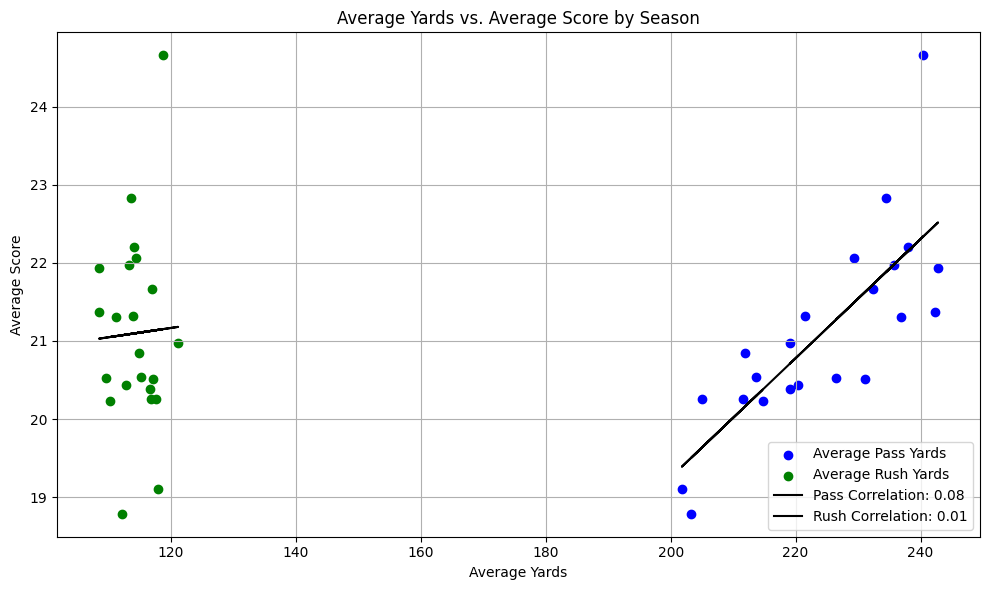

In [43]:
# Calculate average of pass yards (home and away) for each season
avg_pass_yards = (nfl['pass_yards_home'] + nfl['pass_yards_away']) / 2
avg_pass_yards_season = nfl.groupby('season')[['pass_yards_home', 'pass_yards_away']].mean().mean(axis=1)

# Calculate average of rush yards (home and away) for each season
avg_rush_yards = (nfl['rush_yards_home'] + nfl['rush_yards_away']) / 2
avg_rush_yards_season = nfl.groupby('season')[['rush_yards_home', 'rush_yards_away']].mean().mean(axis=1)

# Plot the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for pass yards
pass_scatter = plt.scatter(avg_pass_yards_season, nfl.groupby('season')['score_away'].mean(), label='Average Pass Yards', color='blue', marker='o')

# Scatter plot for rush yards
rush_scatter = plt.scatter(avg_rush_yards_season, nfl.groupby('season')['score_away'].mean(), label='Average Rush Yards', color='green', marker='o')

# Add labels and title
plt.xlabel('Average Yards')
plt.ylabel('Average Score')
plt.title('Average Yards vs. Average Score by Season')
plt.legend()

# Calculate and plot correlation lines
pass_slope, pass_intercept, _, _, _ = linregress(avg_pass_yards_season, nfl.groupby('season')['score_away'].mean())
rush_slope, rush_intercept, _, _, _ = linregress(avg_rush_yards_season, nfl.groupby('season')['score_away'].mean())

plt.plot(avg_pass_yards_season, pass_slope * avg_pass_yards_season + pass_intercept, color='black', label=f'Pass Correlation: {pass_slope:.2f}')
plt.plot(avg_rush_yards_season, rush_slope * avg_rush_yards_season + rush_intercept, color='black', label=f'Rush Correlation: {rush_slope:.2f}')

# Show the plot
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

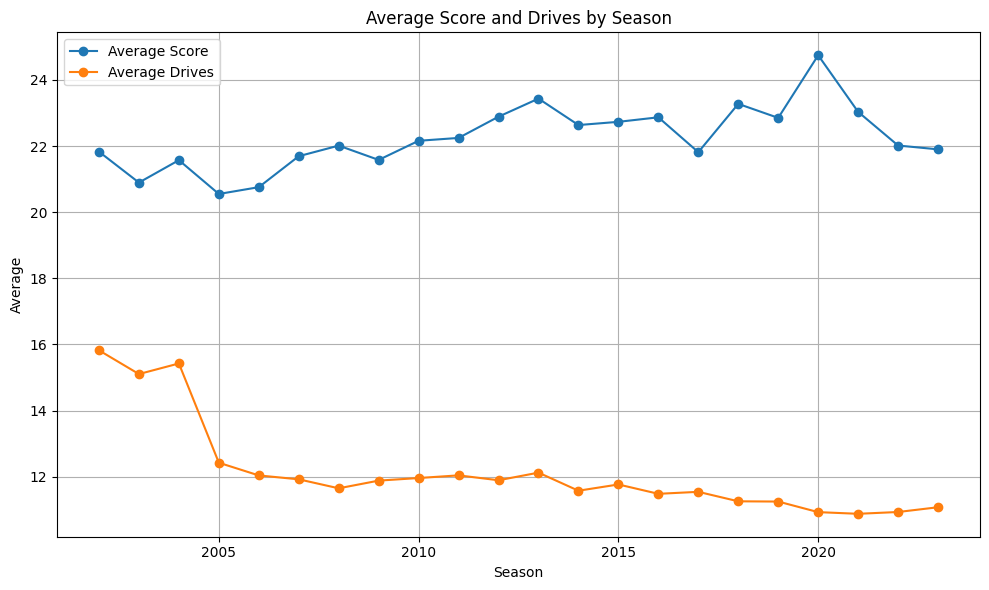

In [44]:
# Calculate average between 'score_away' and 'score_home' for each season
avg_score_season = nfl.groupby('season')[['score_away', 'score_home']].mean().mean(axis=1)

# Calculate average between 'drives_away' and 'drives_home' for each season
avg_drives_season = nfl.groupby('season')[['drives_away', 'drives_home']].mean().mean(axis=1)

# Plot the lines
plt.figure(figsize=(10, 6))
plt.plot(avg_score_season.index, avg_score_season, label='Average Score', marker='o')
plt.plot(avg_drives_season.index, avg_drives_season, label='Average Drives', marker='o')

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Average')
plt.title('Average Score and Drives by Season')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

#### A look into how scoring differs in divisional matchups

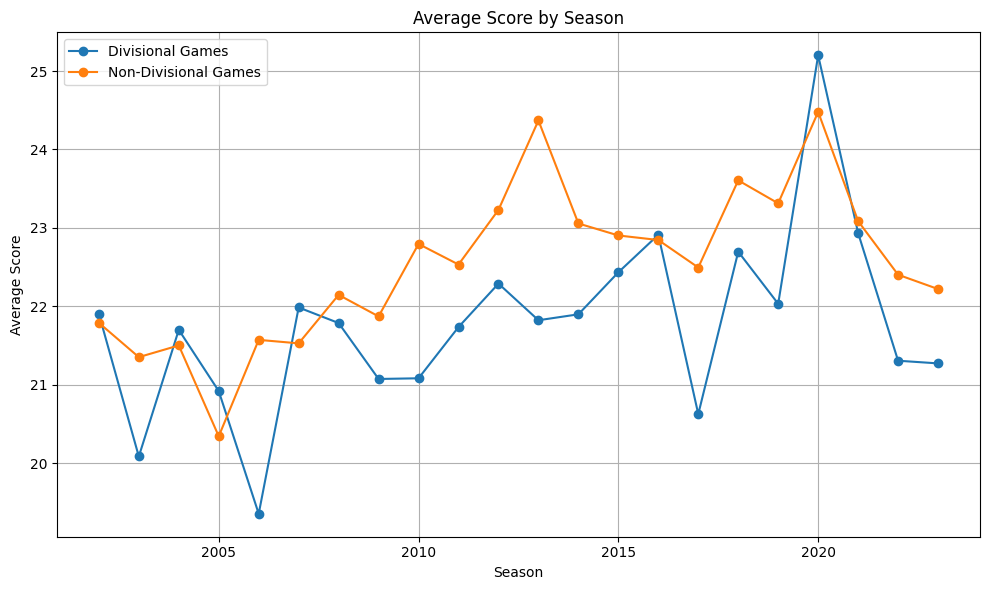

In [45]:
# Calculate average scores for divisional games
avg_divisional_score = divisional_games.groupby('season')[['score_away', 'score_home']].mean().mean(axis=1)

# Calculate average scores for non-divisional games
avg_non_divisional_score = non_divisional_games.groupby('season')[['score_away', 'score_home']].mean().mean(axis=1)

# Plot the lines
plt.figure(figsize=(10, 6))
plt.plot(avg_divisional_score.index, avg_divisional_score, label='Divisional Games', marker='o')
plt.plot(avg_non_divisional_score.index, avg_non_divisional_score, label='Non-Divisional Games', marker='o')

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Average Score')
plt.title('Average Score by Season')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

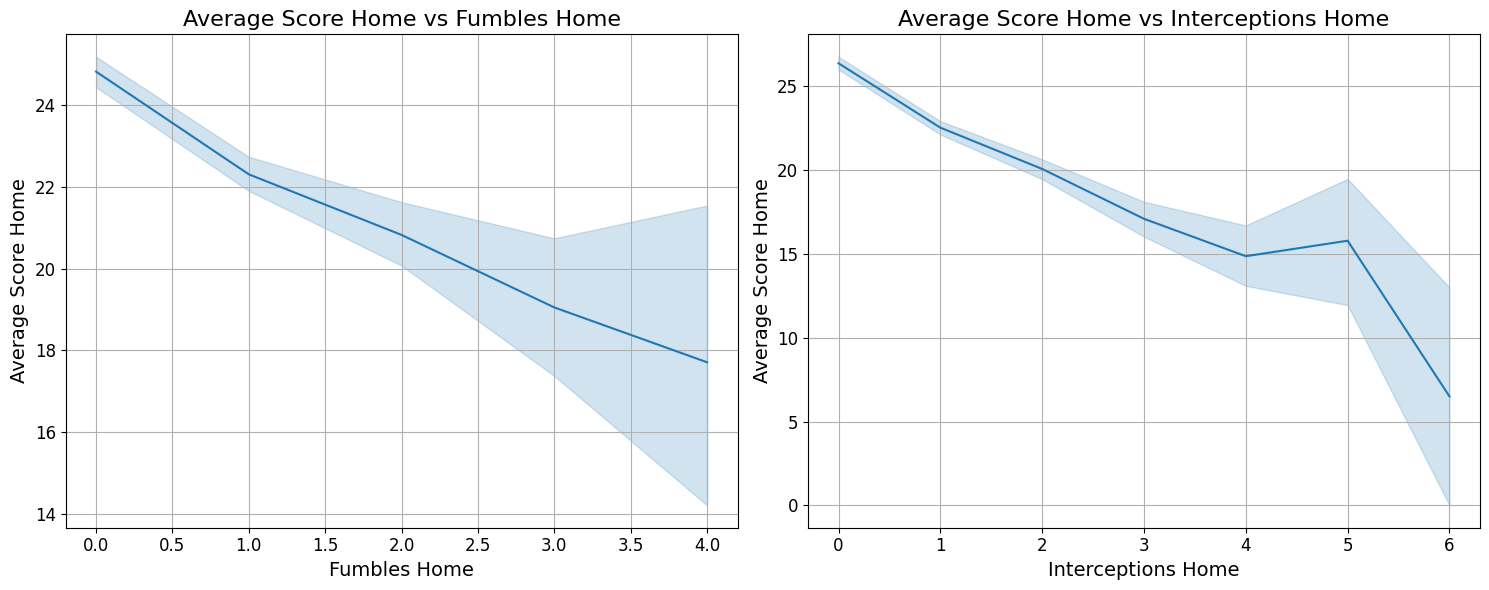

In [46]:
plt.figure(figsize=(15, 6))

# Plot 1: Fumbles Home vs Average Score Home
plt.subplot(1, 2, 1)  
sns.lineplot(data=nfl, x='fumbles_home', y='score_home', estimator='mean')
plt.title('Average Score Home vs Fumbles Home', fontsize=16)
plt.xlabel('Fumbles Home', fontsize=14)
plt.ylabel('Average Score Home', fontsize=14)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)

# Plot 2: Interceptions Home vs Average Score Home
plt.subplot(1, 2, 2)
sns.lineplot(data=nfl, x='interceptions_home', y='score_home', estimator='mean')
plt.title('Average Score Home vs Interceptions Home', fontsize=16)
plt.xlabel('Interceptions Home', fontsize=14)
plt.ylabel('Average Score Home', fontsize=14)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout() 
plt.show()


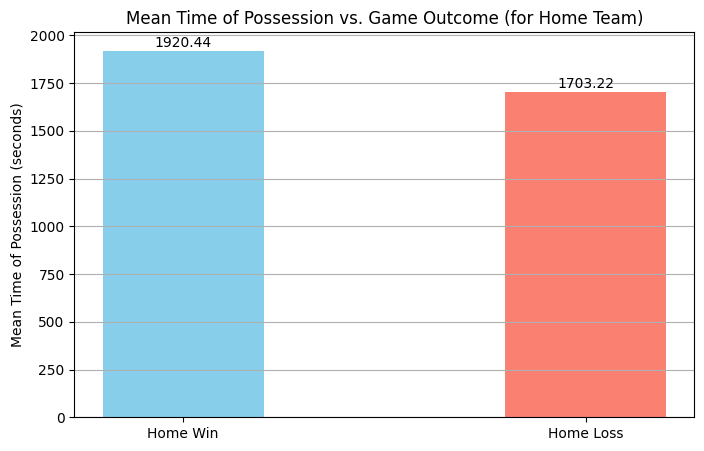

In [47]:
# Calculate mean Time of Possession for home win and home loss

mean_possession_home_win = nfl[nfl['outcome_binary'] == 1]['possession_home_seconds'].mean()
mean_possession_home_lost = nfl[nfl['outcome_binary'] == 0]['possession_home_seconds'].mean()

plt.figure(figsize=(8, 5))

bar_width = 0.4
bar_positions = [0, 1]

plt.bar(bar_positions, [mean_possession_home_win, mean_possession_home_lost], 
        width=bar_width, color=['skyblue', 'salmon'])

plt.text(bar_positions[0], mean_possession_home_win + 20, 
         f'{mean_possession_home_win:.2f}', ha='center')
plt.text(bar_positions[1], mean_possession_home_lost + 20, 
         f'{mean_possession_home_lost:.2f}', ha='center')

plt.ylabel('Mean Time of Possession (seconds)')
plt.title('Mean Time of Possession vs. Game Outcome (for Home Team)')
plt.xticks(bar_positions, ['Home Win', 'Home Loss'])
plt.grid(axis='y')

plt.show()

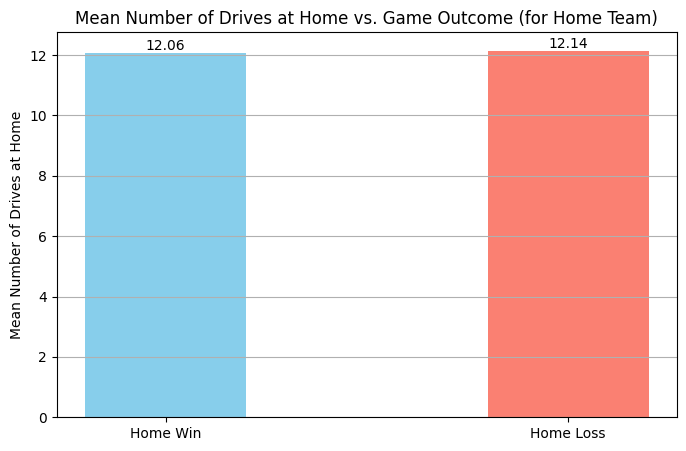

In [48]:
# Calculate mean drives at home for home win and home loss

mean_drives_home_win = nfl[nfl['outcome_binary'] == 1]['drives_home'].mean()
mean_drives_home_loss = nfl[nfl['outcome_binary'] == 0]['drives_home'].mean()

plt.figure(figsize=(8, 5))

bar_width = 0.4
bar_positions = [0, 1]

bars = plt.bar(bar_positions, [mean_drives_home_win, mean_drives_home_loss], 
        width=bar_width, color=['skyblue', 'salmon'])

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, 
             f'{bar.get_height():.2f}', ha='center')

plt.ylabel('Mean Number of Drives at Home')
plt.title('Mean Number of Drives at Home vs. Game Outcome (for Home Team)')
plt.xticks(bar_positions, ['Home Win', 'Home Loss'])
plt.grid(axis='y')

plt.show()

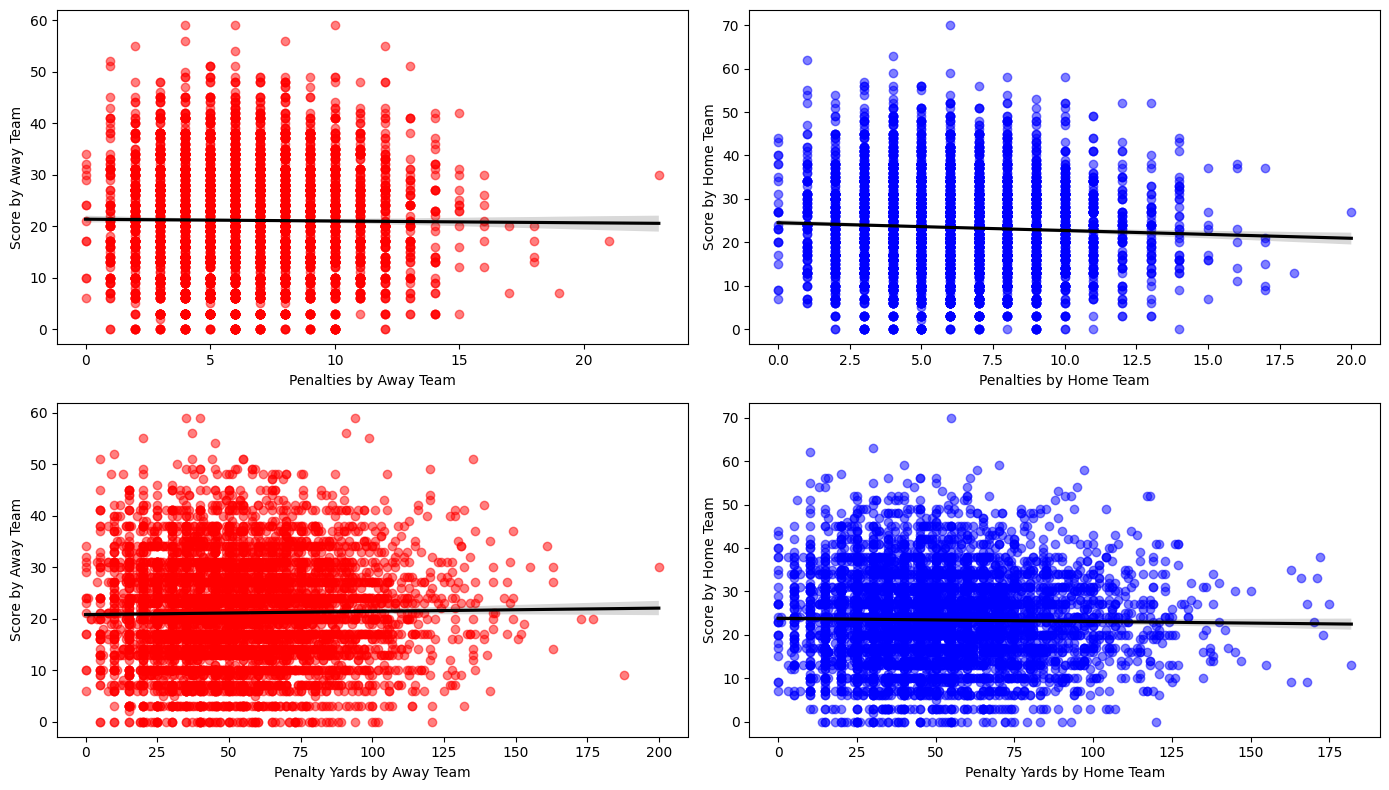

In [49]:
# Plotting the relationships between penalty and the score

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.regplot(x='pen_num_away', y='score_away', data=nfl, color='red', scatter_kws={'alpha':0.5}, line_kws={'color':'black'})
plt.xlabel('Penalties by Away Team')
plt.ylabel('Score by Away Team')

plt.subplot(2, 2, 2)
sns.regplot(x='pen_num_home', y='score_home', data=nfl, color='blue', scatter_kws={'alpha':0.5}, line_kws={'color':'black'})
plt.xlabel('Penalties by Home Team')
plt.ylabel('Score by Home Team')

plt.subplot(2, 2, 3)
sns.regplot(x='pen_yards_away', y='score_away', data=nfl, color='red', scatter_kws={'alpha':0.5}, line_kws={'color':'black'})
plt.xlabel('Penalty Yards by Away Team')
plt.ylabel('Score by Away Team')

plt.subplot(2, 2, 4)
sns.regplot(x='pen_yards_home', y='score_home', data=nfl, color='blue', scatter_kws={'alpha':0.5}, line_kws={'color':'black'})
plt.xlabel('Penalty Yards by Home Team')
plt.ylabel('Score by Home Team')

plt.tight_layout()
plt.show()

# Data Preparation for Modeling

In [50]:
nRow, nCol = nfl.shape
print(f'There are {nRow} rows and {nCol} columns.')

print("\nList of columns:\n")
print(nfl.columns.tolist())

There are 5929 rows and 76 columns.

List of columns:

['season', 'week', 'date', 'away', 'home', 'score_away', 'score_home', 'first_downs_away', 'first_downs_home', 'third_down_comp_away', 'third_down_att_away', 'third_down_comp_home', 'third_down_att_home', 'fourth_down_comp_away', 'fourth_down_att_away', 'fourth_down_comp_home', 'fourth_down_att_home', 'plays_away', 'plays_home', 'drives_away', 'drives_home', 'yards_away', 'yards_home', 'pass_comp_away', 'pass_att_away', 'pass_yards_away', 'pass_comp_home', 'pass_att_home', 'pass_yards_home', 'sacks_num_away', 'sacks_yards_away', 'sacks_num_home', 'sacks_yards_home', 'rush_att_away', 'rush_yards_away', 'rush_att_home', 'rush_yards_home', 'pen_num_away', 'pen_yards_away', 'pen_num_home', 'pen_yards_home', 'redzone_comp_away', 'redzone_att_away', 'redzone_comp_home', 'redzone_att_home', 'fumbles_away', 'fumbles_home', 'interceptions_away', 'interceptions_home', 'def_st_td_away', 'def_st_td_home', 'possession_away', 'possession_home', 

In [50]:
# Specify the columns I want to use for the modeling part
columns_model = ['first_downs_away', 'first_downs_home', 
                 'third_down_comp_away', 'third_down_att_away', 
                 'third_down_comp_home', 'third_down_att_home', 
                 'fourth_down_comp_away', 'fourth_down_att_away', 
                 'fourth_down_comp_home', 'fourth_down_att_home', 
                 'plays_away', 'plays_home', 'drives_away', 'drives_home', 
                 'pass_comp_away', 'pass_att_away', 'pass_yards_away', 
                 'pass_comp_home', 'pass_att_home', 'pass_yards_home', 
                 'sacks_num_away', 'sacks_yards_away', 'sacks_num_home', 'sacks_yards_home', 
                 'rush_att_away', 'rush_yards_away', 'rush_att_home', 'rush_yards_home', 
                 'pen_num_away', 'pen_yards_away', 'pen_num_home', 'pen_yards_home', 
                 'redzone_comp_away', 'redzone_att_away', 'redzone_comp_home', 'redzone_att_home', 
                 'redzone_rate_away', 'redzone_rate_home',
                 'turnover_home','turnover_away',
                 'def_st_td_away', 'def_st_td_home', 
                 'outcome_binary', 
                 'third_down_rate_home', 'third_down_rate_away', 'fourth_down_rate_home', 'fourth_down_rate_away',
                 'possession_away_seconds', 'possession_home_seconds',
                 'days_rest_away', 'days_rest_home']

nfl_df = nfl[columns_model].copy()
nfl_df.head()

first_downs_away  first_downs_home  third_down_comp_away  \
0                13                21                     4   
1                18                26                     2   
2                19                20                     5   
3                27                13                     6   
4                24                24                     5   

   third_down_att_away  third_down_comp_home  third_down_att_home  \
0                   12                     9                   16   
1                    8                     7                   17   
2                   13                     7                   13   
3                   10                     4                   11   
4                   11                     4                   11   

   fourth_down_comp_away  fourth_down_att_away  fourth_down_comp_home  \
0                      0                     0                      0   
1                      0                     0                      2   
2                      0                     0                      0   
3                      0                     0                      0   
4                      0                     0                      0   

   fourth_down_att_home  ...  def_st_td_home  outcome_binary  \
0                     1  ...               0               0   
1                     2  ...               0               0   
2                     0  ...               0               1   
3                     0  ...               0               0   
4                     0  ...               0               0   

   third_down_rate_home  third_down_rate_away  fourth_down_rate_home  \
0              0.562500              0.333333                    0.0   
1              0.411765              0.250000                    1.0   
2              0.538462              0.384615                    0.0   
3              0.363636              0.600000                    0.0   
4              0.363636              0.454545                    0.0   

   fourth_down_rate_away  possession_away_seconds  possession_home_seconds  \
0                    0.0                     1652                     1948   
1                    0.0                     1266                     2348   
2                    0.0                     1891                     1709   
3                    0.0                     2268                     1332   
4                    0.0                     1816                     1784   

   days_rest_away  days_rest_home  
0            14.0            14.0  
1            14.0            14.0  
2            14.0            14.0  
3            14.0            14.0  
4            14.0            14.0  

[5 rows x 51 columns]

In [51]:
# Compute the correlation matrix
correlation_matrix = nfl_df.corr()

# Define a correlation threshold
correlation_threshold = 0.7

highly_correlated_pairs = {}

# Identify highly correlated columns
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            highly_correlated_pairs[(colname_i, colname_j)] = correlation_value

for pair, correlation in highly_correlated_pairs.items():
    print(f"'{pair[0]}'||'{pair[1]}'|| correlation value {correlation:.2f}")


'fourth_down_att_away'||'fourth_down_comp_away'|| correlation value 0.73
'fourth_down_att_home'||'fourth_down_comp_home'|| correlation value 0.74
'plays_away'||'first_downs_away'|| correlation value 0.70
'drives_home'||'drives_away'|| correlation value 0.83
'pass_att_away'||'pass_comp_away'|| correlation value 0.85
'pass_yards_away'||'pass_comp_away'|| correlation value 0.76
'pass_att_home'||'pass_comp_home'|| correlation value 0.85
'pass_yards_home'||'pass_comp_home'|| correlation value 0.75
'sacks_yards_away'||'sacks_num_away'|| correlation value 0.90
'sacks_yards_home'||'sacks_num_home'|| correlation value 0.89
'rush_yards_away'||'rush_att_away'|| correlation value 0.76
'rush_yards_home'||'rush_att_home'|| correlation value 0.75
'pen_yards_away'||'pen_num_away'|| correlation value 0.86
'pen_yards_home'||'pen_num_home'|| correlation value 0.87
'redzone_rate_away'||'redzone_comp_away'|| correlation value 0.77
'redzone_rate_home'||'redzone_comp_home'|| correlation value 0.79
'third_dow

In [52]:
# Define columns to remove
columns_to_remove = ['first_downs_away', 'first_downs_home', 
                     'third_down_comp_home', 'third_down_comp_away', 
                     'third_down_att_home', 'third_down_att_away', 
                     'fourth_down_att_home', 'fourth_down_comp_home', 
                     'fourth_down_att_away', 'fourth_down_comp_away', 
                     'drives_away', 'drives_home',
                     'pass_att_away', 'pass_comp_away', 
                     'pass_comp_home', 'pass_comp_away',
                     'sacks_num_away', 'sacks_num_home', 
                     'rush_att_away', 'rush_att_home', 
                     'pen_num_away', 'pen_num_home', 
                     'possession_away_seconds', 'possession_away_seconds',
                     'plays_away', 'plays_home',
                     'redzone_comp_away', 'redzone_comp_home']

# Remove columns from nfl_df
nfl_df = nfl_df.drop(columns=columns_to_remove)

print("\nList of columns:\n")
print(nfl_df.columns.tolist())
print(f"\nTotal number of columns: {len(nfl_df.columns)}")


List of columns:

['pass_yards_away', 'pass_att_home', 'pass_yards_home', 'sacks_yards_away', 'sacks_yards_home', 'rush_yards_away', 'rush_yards_home', 'pen_yards_away', 'pen_yards_home', 'redzone_att_away', 'redzone_att_home', 'redzone_rate_away', 'redzone_rate_home', 'turnover_home', 'turnover_away', 'def_st_td_away', 'def_st_td_home', 'outcome_binary', 'third_down_rate_home', 'third_down_rate_away', 'fourth_down_rate_home', 'fourth_down_rate_away', 'possession_home_seconds', 'days_rest_away', 'days_rest_home']

Total number of columns: 25


In [53]:
# Check for correlations among remaining columns

# Compute the correlation matrix
correlation_matrix = nfl_df.corr()

# Define a correlation threshold
correlation_threshold = 0.7

highly_correlated_pairs = {}

# Identify highly correlated columns
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            highly_correlated_pairs[(colname_i, colname_j)] = correlation_value

for pair, correlation in highly_correlated_pairs.items():
    print(f"'{pair[0]}'||'{pair[1]}'|| correlation value {correlation:.2f}")

In [54]:
team_name = nfl[['away', 'home']]
team_names = set(team_name['away']).union(set(team_name['home']))

one_hot_df = pd.DataFrame()

# Create one-hot encoding for each unique team name
for team in team_names:
    one_hot_df[f'{team}_away'] = (team_name['away'] == team).astype(int)
    one_hot_df[f'{team}_home'] = (team_name['home'] == team).astype(int)

print(one_hot_df.columns.tolist())

one_hot_df.head()

['49ers_away', '49ers_home', 'Ravens_away', 'Ravens_home', 'Panthers_away', 'Panthers_home', 'Dolphins_away', 'Dolphins_home', 'Jaguars_away', 'Jaguars_home', 'Rams_away', 'Rams_home', 'Colts_away', 'Colts_home', 'Cowboys_away', 'Cowboys_home', 'Seahawks_away', 'Seahawks_home', 'Giants_away', 'Giants_home', 'Buccaneers_away', 'Buccaneers_home', 'Patriots_away', 'Patriots_home', 'Jets_away', 'Jets_home', 'Cardinals_away', 'Cardinals_home', 'Texans_away', 'Texans_home', 'Lions_away', 'Lions_home', 'Chiefs_away', 'Chiefs_home', 'Browns_away', 'Browns_home', 'Bengals_away', 'Bengals_home', 'Raiders_away', 'Raiders_home', 'Chargers_away', 'Chargers_home', 'Falcons_away', 'Falcons_home', 'Eagles_away', 'Eagles_home', 'Packers_away', 'Packers_home', 'Titans_away', 'Titans_home', 'Bears_away', 'Bears_home', 'Saints_away', 'Saints_home', 'Vikings_away', 'Vikings_home', 'Steelers_away', 'Steelers_home', 'Broncos_away', 'Broncos_home', 'Bills_away', 'Bills_home', 'Commanders_away', 'Commanders_ho

49ers_away  49ers_home  Ravens_away  Ravens_home  Panthers_away  \
0           1           0            0            0              0   
1           0           0            0            0              0   
2           0           0            0            0              0   
3           0           0            0            0              0   
4           0           0            0            0              0   

   Panthers_home  Dolphins_away  Dolphins_home  Jaguars_away  Jaguars_home  \
0              0              0              0             0             0   
1              0              0              0             0             0   
2              0              0              0             0             0   
3              0              0              0             0             0   
4              0              0              0             0             0   

   ...  Vikings_away  Vikings_home  Steelers_away  Steelers_home  \
0  ...             0             0              0              0   
1  ...             0             0              0              0   
2  ...             1             0              0              0   
3  ...             0             0              0              0   
4  ...             0             0              0              0   

   Broncos_away  Broncos_home  Bills_away  Bills_home  Commanders_away  \
0             0             0           0           0                0   
1             0             0           0           1                0   
2             0             0           0           0                0   
3             0             0           0           0                0   
4             0             0           0           0                0   

   Commanders_home  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 64 columns]

In [55]:
# Concatenate nfl_df and one_hot_df along the columns axis
df = pd.concat([nfl_df, one_hot_df], axis=1)

print("\nList of columns:\n")
print(df.columns.tolist())
print(f"\nTotal number of columns: {len(df.columns)}")

df.head()


List of columns:

['pass_yards_away', 'pass_att_home', 'pass_yards_home', 'sacks_yards_away', 'sacks_yards_home', 'rush_yards_away', 'rush_yards_home', 'pen_yards_away', 'pen_yards_home', 'redzone_att_away', 'redzone_att_home', 'redzone_rate_away', 'redzone_rate_home', 'turnover_home', 'turnover_away', 'def_st_td_away', 'def_st_td_home', 'outcome_binary', 'third_down_rate_home', 'third_down_rate_away', 'fourth_down_rate_home', 'fourth_down_rate_away', 'possession_home_seconds', 'days_rest_away', 'days_rest_home', '49ers_away', '49ers_home', 'Ravens_away', 'Ravens_home', 'Panthers_away', 'Panthers_home', 'Dolphins_away', 'Dolphins_home', 'Jaguars_away', 'Jaguars_home', 'Rams_away', 'Rams_home', 'Colts_away', 'Colts_home', 'Cowboys_away', 'Cowboys_home', 'Seahawks_away', 'Seahawks_home', 'Giants_away', 'Giants_home', 'Buccaneers_away', 'Buccaneers_home', 'Patriots_away', 'Patriots_home', 'Jets_away', 'Jets_home', 'Cardinals_away', 'Cardinals_home', 'Texans_away', 'Texans_home', 'Lions_a

pass_yards_away  pass_att_home  pass_yards_home  sacks_yards_away  \
0              166             45              318                 0   
1              193             39              242                17   
2              228             33              288                 6   
3              160             31              167                 0   
4              276             40              352                 0   

   sacks_yards_home  rush_yards_away  rush_yards_home  pen_yards_away  \
0                24              113               43              29   
1                29               73              142              90   
2                 9              140               80              52   
3                31              241               36              39   
4                 7              194               59              87   

   pen_yards_home  redzone_att_away  ...  Vikings_away  Vikings_home  \
0              80                 8  ...             0             0   
1              82                 9  ...             0             0   
2              33                 7  ...             1             0   
3              57                 7  ...             0             0   
4              38                10  ...             0             0   

   Steelers_away  Steelers_home  Broncos_away  Broncos_home  Bills_away  \
0              0              0             0             0           0   
1              0              0             0             0           0   
2              0              0             0             0           0   
3              0              0             0             0           0   
4              0              0             0             0           0   

   Bills_home  Commanders_away  Commanders_home  
0           0                0                0  
1           1                0                0  
2           0                0                0  
3           0                0                0  
4           0                0                0  

[5 rows x 89 columns]

### Define X and y

In [56]:
X = df.drop(columns=['outcome_binary'])  # Features (all columns except 'outcome_binary')
y = df['outcome_binary']  # Target variable

# Display the shapes of X and y
print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of features (X): (5929, 88)
Shape of target variable (y): (5929,)


### Train Test Split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4743, 88)
Shape of X_test: (1186, 88)
Shape of y_train: (4743,)
Shape of y_test: (1186,)


# Data Modeling

#### Logistic Regression Model

In [58]:

imputer = SimpleImputer(strategy='mean')  # Impute missing values with mean
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

def print_metrics(title, accuracy, precision, recall, f1_score, roc_auc):
    print(title)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1_score:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")
    print()

model = LogisticRegression()
model.fit(X_train_imputed, y_train)

y_train_pred_lr = model.predict(X_train_imputed)

train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
train_precision_lr = precision_score(y_train, y_train_pred_lr)
train_recall_lr = recall_score(y_train, y_train_pred_lr)
train_f1_lr = f1_score(y_train, y_train_pred_lr)
train_roc_auc_lr = roc_auc_score(y_train, y_train_pred_lr)

train_conf_matrix_lr = confusion_matrix(y_train, y_train_pred_lr)
train_class_report_lr = classification_report(y_train, y_train_pred_lr)

print_metrics("Training Set Metrics:\n", train_accuracy_lr, train_precision_lr, train_recall_lr, train_f1_lr, train_roc_auc_lr)
print("Confusion Matrix:")
print(train_conf_matrix_lr)
print("Classification Report:")
print(train_class_report_lr)

y_test_pred = model.predict(X_test_imputed)

test_accuracy_lr = accuracy_score(y_test, y_test_pred)
test_precision_lr = precision_score(y_test, y_test_pred)
test_recall_lr = recall_score(y_test, y_test_pred)
test_f1_lr = f1_score(y_test, y_test_pred)
test_roc_auc_lr = roc_auc_score(y_test, y_test_pred)

test_conf_matrix_lr = confusion_matrix(y_test, y_test_pred)
test_class_report_lr = classification_report(y_test, y_test_pred)

print_metrics("Testing Set Metrics:\n", test_accuracy_lr, test_precision_lr, test_recall_lr, test_f1_lr, test_roc_auc_lr)
print("Confusion Matrix:")
print(test_conf_matrix_lr)
print("Classification Report:")
print(test_class_report_lr)

# Check for overfitting
if train_accuracy_lr > test_accuracy_lr:
    print("\nWarning: Model may be overfitting as Training Accuracy is higher than Testing Accuracy.")


Training Set Metrics:

Accuracy: 0.8229
Precision: 0.8354
Recall: 0.8530
F1-score: 0.8441
AUC-ROC: 0.8186

Confusion Matrix:
[[1629  448]
 [ 392 2274]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      2077
           1       0.84      0.85      0.84      2666

    accuracy                           0.82      4743
   macro avg       0.82      0.82      0.82      4743
weighted avg       0.82      0.82      0.82      4743

Testing Set Metrics:

Accuracy: 0.8288
Precision: 0.8447
Recall: 0.8584
F1-score: 0.8515
AUC-ROC: 0.8239

Confusion Matrix:
[[401 107]
 [ 96 582]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       508
           1       0.84      0.86      0.85       678

    accuracy                           0.83      1186
   macro avg       0.83      0.82      0.82      1186
weighted avg       0.83      0.83      0.83      1186



these metrics suggest that our logistic regression model is performing well and generalizing well to unseen data. There doesn't seem to be a significant overfitting issue, as the performance on the testing set is comparable to that on the training set.

#### Random Forest model

In [59]:

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_imputed, y_train)

# training set
y_train_pred_rf = random_forest_model.predict(X_train_imputed)

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf)
train_recall_rf = recall_score(y_train, y_train_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf)
train_roc_auc_rf = roc_auc_score(y_train, y_train_pred_rf)
train_conf_matrix_rf = confusion_matrix(y_train, y_train_pred_rf)
train_class_report_rf = classification_report(y_train, y_train_pred_rf)

print_metrics("Random Forest Training Set Metrics:\n", train_accuracy_rf, train_precision_rf, train_recall_rf, train_f1_rf, train_roc_auc_rf)
print("Random Forest Confusion Matrix:")
print(train_conf_matrix_rf)
print("Random Forest Classification Report:")
print(train_class_report_rf)

# testing set
y_test_pred_rf = random_forest_model.predict(X_test_imputed)

test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)
test_roc_auc_rf = roc_auc_score(y_test, y_test_pred_rf)
test_conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
test_class_report_rf = classification_report(y_test, y_test_pred_rf)

print_metrics("Random Forest Testing Set Metrics:\n", test_accuracy_rf, test_precision_rf, test_recall_rf, test_f1_rf, test_roc_auc_rf)
print("Random Forest Confusion Matrix:")
print(test_conf_matrix_rf)
print("Random Forest Classification Report:")
print(test_class_report_rf)

# Check for overfitting
if train_accuracy_rf > test_accuracy_rf:
    print("\nWarning: Random Forest Model may be overfitting as Training Accuracy is higher than Testing Accuracy.")


Random Forest Training Set Metrics:

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUC-ROC: 1.0000

Random Forest Confusion Matrix:
[[2077    0]
 [   0 2666]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2077
           1       1.00      1.00      1.00      2666

    accuracy                           1.00      4743
   macro avg       1.00      1.00      1.00      4743
weighted avg       1.00      1.00      1.00      4743

Random Forest Testing Set Metrics:

Accuracy: 0.8642
Precision: 0.8667
Recall: 0.9012
F1-score: 0.8836
AUC-ROC: 0.8581

Random Forest Confusion Matrix:
[[414  94]
 [ 67 611]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       508
           1       0.87      0.90      0.88       678

    accuracy                           0.86      1186
   macro avg       0.86   

In [60]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [10, 15, 20, 25],
    'min_samples_split': [5, 6, 7, 8],
    'min_samples_leaf': [1, 2, 3]
}

random_forest_model_tune = RandomForestClassifier(n_estimators=100, random_state=42)

grid_search_rf = GridSearchCV(random_forest_model_tune, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_imputed, y_train)

# best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters:", best_params_rf)

best_model_rf = grid_search_rf.best_estimator_

y_test_pred_rf_tune = best_model_rf.predict(X_test_imputed)

test_accuracy_rf_tune = accuracy_score(y_test, y_test_pred_rf_tune)
print("Accuracy on Testing Set:", test_accuracy_rf_tune)

# Check for overfitting

if train_accuracy_rf > test_accuracy_rf_tune:
    print("\nThe model may be overfitting as Training Accuracy is higher than Testing Accuracy.")
else:
    print("\nThe model is not overfitting as Training Accuracy is not higher than Testing Accuracy.")

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 8}
Accuracy on Testing Set: 0.8642495784148398

The model may be overfitting as Training Accuracy is higher than Testing Accuracy.


#### Gradient Boosting model

In [61]:

gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

gradient_boosting_model.fit(X_train_imputed, y_train)

# training set
y_train_pred_gb = gradient_boosting_model.predict(X_train_imputed)

# training set
train_accuracy_gb = accuracy_score(y_train, y_train_pred_gb)
train_precision_gb = precision_score(y_train, y_train_pred_gb)
train_recall_gb = recall_score(y_train, y_train_pred_gb)
train_f1_gb = f1_score(y_train, y_train_pred_gb)
train_roc_auc_gb = roc_auc_score(y_train, y_train_pred_gb)
train_conf_matrix_gb = confusion_matrix(y_train, y_train_pred_gb)
train_class_report_gb = classification_report(y_train, y_train_pred_gb)

print_metrics("Gradient Boosting Training Set Metrics:\n", train_accuracy_gb, train_precision_gb, train_recall_gb, train_f1_gb, train_roc_auc_gb)
print("Gradient Boosting Confusion Matrix:")
print(train_conf_matrix_gb)
print("Gradient Boosting Classification Report:")
print(train_class_report_gb)

# testing set
y_test_pred_gb = gradient_boosting_model.predict(X_test_imputed)

# testing set
test_accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
test_precision_gb = precision_score(y_test, y_test_pred_gb)
test_recall_gb = recall_score(y_test, y_test_pred_gb)
test_f1_gb = f1_score(y_test, y_test_pred_gb)
test_roc_auc_gb = roc_auc_score(y_test, y_test_pred_gb)
test_conf_matrix_gb = confusion_matrix(y_test, y_test_pred_gb)
test_class_report_gb = classification_report(y_test, y_test_pred_gb)

print_metrics("Gradient Boosting Testing Set Metrics:\n", test_accuracy_gb, test_precision_gb, test_recall_gb, test_f1_gb, test_roc_auc_gb)
print("Gradient Boosting Confusion Matrix:")
print(test_conf_matrix_gb)
print("Gradient Boosting Classification Report:")
print(test_class_report_gb)

# Check for overfitting
if train_accuracy_gb > test_accuracy_gb:
    print("\nWarning: Gradient Boosting Model may be overfitting as Training Accuracy is higher than Testing Accuracy.")


Gradient Boosting Training Set Metrics:

Accuracy: 0.9192
Precision: 0.9223
Recall: 0.9351
F1-score: 0.9287
AUC-ROC: 0.9170

Gradient Boosting Confusion Matrix:
[[1867  210]
 [ 173 2493]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2077
           1       0.92      0.94      0.93      2666

    accuracy                           0.92      4743
   macro avg       0.92      0.92      0.92      4743
weighted avg       0.92      0.92      0.92      4743

Gradient Boosting Testing Set Metrics:

Accuracy: 0.8777
Precision: 0.8879
Recall: 0.8997
F1-score: 0.8938
AUC-ROC: 0.8741

Gradient Boosting Confusion Matrix:
[[431  77]
 [ 68 610]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       508
           1       0.89      0.90      0.89       678

    accuracy                           0.88      1186
  

In [62]:

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100]
}

gradient_boosting_model_tune = GradientBoostingClassifier(random_state=42)

# grid search with cross-validation
grid_search_gb = GridSearchCV(gradient_boosting_model_tune, param_grid, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train_imputed, y_train)

# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_
print("Best Hyperparameters:", best_params_gb)

best_model_gb = grid_search_gb.best_estimator_

y_test_pred_gb_tune = best_model_gb.predict(X_test_imputed)

test_accuracy_gb_tune = accuracy_score(y_test, y_test_pred_gb_tune)
print("Accuracy on Testing Set:", test_accuracy_gb_tune)

# Check for overfitting
if train_accuracy_gb > test_accuracy_gb_tune:
    print("\nThe model may be overfitting as Training Accuracy is higher than Testing Accuracy.")
else:
    print("\nThe model is not overfitting as Training Accuracy is not higher than Testing Accuracy.")


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy on Testing Set: 0.8659359190556493

The model may be overfitting as Training Accuracy is higher than Testing Accuracy.


#### SVM model

In [63]:


svm_model = SVC(kernel='rbf', random_state=42)  

svm_model.fit(X_train_imputed, y_train)

# training set
y_train_pred_svm = svm_model.predict(X_train_imputed)

# training set
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
train_precision_svm = precision_score(y_train, y_train_pred_svm)
train_recall_svm = recall_score(y_train, y_train_pred_svm)
train_f1_svm = f1_score(y_train, y_train_pred_svm)
train_roc_auc_svm = roc_auc_score(y_train, y_train_pred_svm)
train_conf_matrix_svm = confusion_matrix(y_train, y_train_pred_svm)
train_class_report_svm = classification_report(y_train, y_train_pred_svm)

print_metrics("SVM Training Set Metrics:\n", train_accuracy_svm, train_precision_svm, train_recall_svm, train_f1_svm, train_roc_auc_svm)
print("SVM Confusion Matrix:")
print(train_conf_matrix_svm)
print("SVM Classification Report:")
print(train_class_report_svm)

# testing set
y_test_pred_svm = svm_model.predict(X_test_imputed)

# testing set
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
test_precision_svm = precision_score(y_test, y_test_pred_svm)
test_recall_svm = recall_score(y_test, y_test_pred_svm)
test_f1_svm = f1_score(y_test, y_test_pred_svm)
test_roc_auc_svm = roc_auc_score(y_test, y_test_pred_svm)
test_conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
test_class_report_svm = classification_report(y_test, y_test_pred_svm)

print_metrics("SVM Testing Set Metrics:\n", test_accuracy_svm, test_precision_svm, test_recall_svm, test_f1_svm, test_roc_auc_svm)
print("SVM Confusion Matrix:")
print(test_conf_matrix_svm)
print("SVM Classification Report:")
print(test_class_report_svm)

# Check for overfitting
if train_accuracy_svm > test_accuracy_svm:
    print("\nWarning: SVM Model may be overfitting as Training Accuracy is higher than Testing Accuracy.")


SVM Training Set Metrics:

Accuracy: 0.7400
Precision: 0.7383
Recall: 0.8327
F1-score: 0.7827
AUC-ROC: 0.7269

SVM Confusion Matrix:
[[1290  787]
 [ 446 2220]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.62      0.68      2077
           1       0.74      0.83      0.78      2666

    accuracy                           0.74      4743
   macro avg       0.74      0.73      0.73      4743
weighted avg       0.74      0.74      0.74      4743

SVM Testing Set Metrics:

Accuracy: 0.7445
Precision: 0.7483
Recall: 0.8333
F1-score: 0.7886
AUC-ROC: 0.7297

SVM Confusion Matrix:
[[318 190]
 [113 565]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       508
           1       0.75      0.83      0.79       678

    accuracy                           0.74      1186
   macro avg       0.74      0.73      0.73      1186
weighted avg       0.74      0.7

#### Gaussian Naive Bayes model

In [64]:

gnb_model = GaussianNB()
gnb_model.fit(X_train_imputed, y_train)

# training set
y_train_pred_gnb = gnb_model.predict(X_train_imputed)

train_accuracy_gnb = accuracy_score(y_train, y_train_pred_gnb)
train_precision_gnb = precision_score(y_train, y_train_pred_gnb)
train_recall_gnb = recall_score(y_train, y_train_pred_gnb)
train_f1_gnb = f1_score(y_train, y_train_pred_gnb)
train_roc_auc_gnb = roc_auc_score(y_train, y_train_pred_gnb)
train_conf_matrix_gnb = confusion_matrix(y_train, y_train_pred_gnb)
train_class_report_gnb = classification_report(y_train, y_train_pred_gnb)

print_metrics("Gaussian Naive Bayes Training Set Metrics:\n", train_accuracy_gnb, train_precision_gnb, train_recall_gnb, train_f1_gnb, train_roc_auc_gnb)
print("Gaussian Naive Bayes Confusion Matrix:")
print(train_conf_matrix_gnb)
print("Gaussian Naive Bayes Classification Report:")
print(train_class_report_gnb)

# testing set
y_test_pred_gnb = gnb_model.predict(X_test_imputed)

test_accuracy_gnb = accuracy_score(y_test, y_test_pred_gnb)
test_precision_gnb = precision_score(y_test, y_test_pred_gnb)
test_recall_gnb = recall_score(y_test, y_test_pred_gnb)
test_f1_gnb = f1_score(y_test, y_test_pred_gnb)
test_roc_auc_gnb = roc_auc_score(y_test, y_test_pred_gnb)
test_conf_matrix_gnb = confusion_matrix(y_test, y_test_pred_gnb)
test_class_report_gnb = classification_report(y_test, y_test_pred_gnb)

print_metrics("Gaussian Naive Bayes Testing Set Metrics:\n", test_accuracy_gnb, test_precision_gnb, test_recall_gnb, test_f1_gnb, test_roc_auc_gnb)
print("Gaussian Naive Bayes Confusion Matrix:")
print(test_conf_matrix_gnb)
print("Gaussian Naive Bayes Classification Report:")
print(test_class_report_gnb)

# Check for overfitting
if train_accuracy_gnb > test_accuracy_gnb:
    print("\nWarning: Gaussian Naive Bayes Model may be overfitting as Training Accuracy is higher than Testing Accuracy.")


Gaussian Naive Bayes Training Set Metrics:

Accuracy: 0.7348
Precision: 0.7843
Recall: 0.7284
F1-score: 0.7553
AUC-ROC: 0.7357

Gaussian Naive Bayes Confusion Matrix:
[[1543  534]
 [ 724 1942]]
Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      2077
           1       0.78      0.73      0.76      2666

    accuracy                           0.73      4743
   macro avg       0.73      0.74      0.73      4743
weighted avg       0.74      0.73      0.74      4743

Gaussian Naive Bayes Testing Set Metrics:

Accuracy: 0.7083
Precision: 0.7643
Recall: 0.7080
F1-score: 0.7351
AUC-ROC: 0.7083

Gaussian Naive Bayes Confusion Matrix:
[[360 148]
 [198 480]]
Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       508
           1       0.76      0.71      0.74       678

    accuracy                          

In [65]:

# Create a list to store the results
results = []

# Append results for Logistic Regression
results.append({'Model': 'Logistic Regression',
                'Train Accuracy': train_accuracy_lr,
                'Test Accuracy': test_accuracy_lr,
                'Train Precision': train_precision_lr,
                'Test Precision': test_precision_lr,
                'Train Recall': train_recall_lr,
                'Test Recall': test_recall_lr,
                'Train F1-score': train_f1_lr,
                'Test F1-score': test_f1_lr,
                'Train ROC-AUC': train_roc_auc_lr,
                'Test ROC-AUC': test_roc_auc_lr})

# Append results for Random Forest
results.append({'Model': 'Random Forest',
                'Train Accuracy': train_accuracy_rf,
                'Test Accuracy': test_accuracy_rf,
                'Train Precision': train_precision_rf,
                'Test Precision': test_precision_rf,
                'Train Recall': train_recall_rf,
                'Test Recall': test_recall_rf,
                'Train F1-score': train_f1_rf,
                'Test F1-score': test_f1_rf,
                'Train ROC-AUC': train_roc_auc_rf,
                'Test ROC-AUC': test_roc_auc_rf})

# Append results for Gradient Boosting
results.append({'Model': 'Gradient Boosting',
                'Train Accuracy': train_accuracy_gb,
                'Test Accuracy': test_accuracy_gb,
                'Train Precision': train_precision_gb,
                'Test Precision': test_precision_gb,
                'Train Recall': train_recall_gb,
                'Test Recall': test_recall_gb,
                'Train F1-score': train_f1_gb,
                'Test F1-score': test_f1_gb,
                'Train ROC-AUC': train_roc_auc_gb,
                'Test ROC-AUC': test_roc_auc_gb})

# Append results for SVM
results.append({'Model': 'SVM',
                'Train Accuracy': train_accuracy_svm,
                'Test Accuracy': test_accuracy_svm,
                'Train Precision': train_precision_svm,
                'Test Precision': test_precision_svm,
                'Train Recall': train_recall_svm,
                'Test Recall': test_recall_svm,
                'Train F1-score': train_f1_svm,
                'Test F1-score': test_f1_svm,
                'Train ROC-AUC': train_roc_auc_svm,
                'Test ROC-AUC': test_roc_auc_svm})

# Append results for Gaussian Naive Bayes
results.append({'Model': 'Gaussian Naive Bayes',
                'Train Accuracy': train_accuracy_gnb,
                'Test Accuracy': test_accuracy_gnb,
                'Train Precision': train_precision_gnb,
                'Test Precision': test_precision_gnb,
                'Train Recall': train_recall_gnb,
                'Test Recall': test_recall_gnb,
                'Train F1-score': train_f1_gnb,
                'Test F1-score': test_f1_gnb,
                'Train ROC-AUC': train_roc_auc_gnb,
                'Test ROC-AUC': test_roc_auc_gnb})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Print the results DataFrame
results_df


Model  Train Accuracy  Test Accuracy  Train Precision  \
0   Logistic Regression        0.822897       0.828836         0.835415   
1         Random Forest        1.000000       0.864250         1.000000   
2     Gradient Boosting        0.919249       0.877740         0.922309   
3                   SVM        0.740038       0.744519         0.738277   
4  Gaussian Naive Bayes        0.734767       0.708263         0.784330   

   Test Precision  Train Recall  Test Recall  Train F1-score  Test F1-score  \
0        0.844702      0.852963     0.858407        0.844098       0.851500   
1        0.866667      1.000000     0.901180        1.000000       0.883586   
2        0.887918      0.935109     0.899705        0.928665       0.893773   
3        0.748344      0.832708     0.833333        0.782655       0.788555   
4        0.764331      0.728432     0.707965        0.755348       0.735069   

   Train ROC-AUC  Test ROC-AUC  
0       0.818634      0.823889  
1       1.000000      0.858070  
2       0.917001      0.874065  
3       0.726898      0.729659  
4       0.735665      0.708313

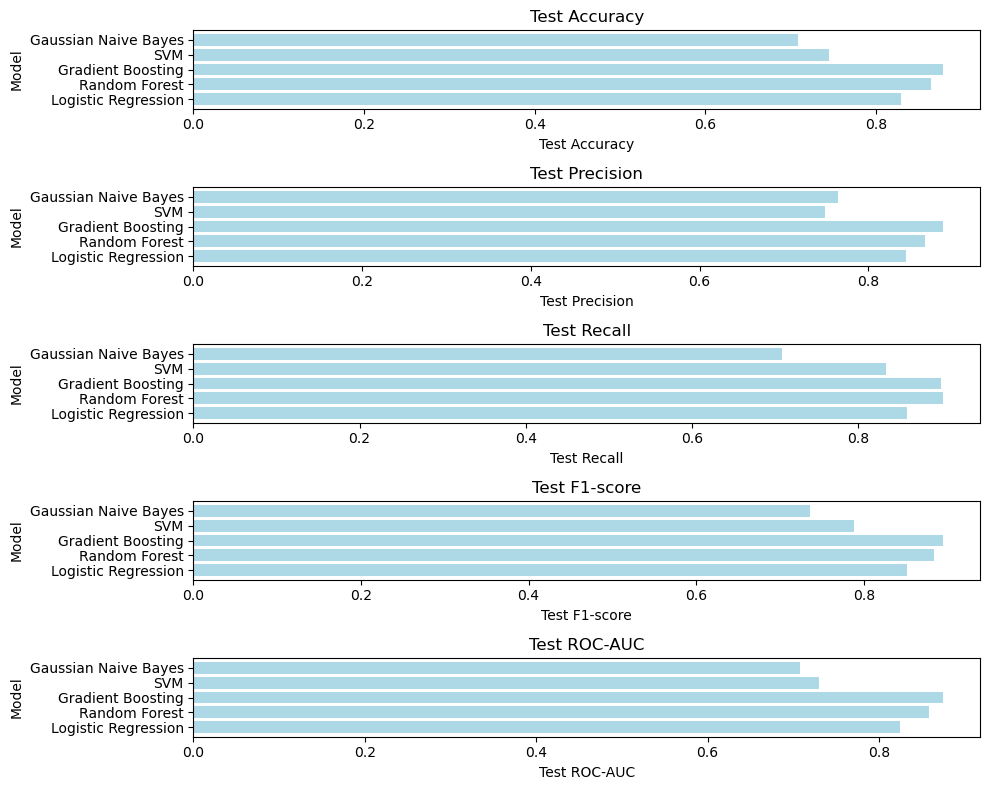

In [66]:
# compare the performance

plt.figure(figsize=(10, 8))

metrics = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-score', 'Test ROC-AUC']

for i, metric in enumerate(metrics, start=1):
    plt.subplot(5, 1, i)
    plt.barh(results_df['Model'], results_df[metric], color='lightblue')
    plt.title(metric)
    plt.xlabel(metric)
    plt.ylabel('Model')

plt.tight_layout()

plt.show()